# 2. Words as features

In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from gensim.downloader import load
import gensim
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist 
from gensim.models import Word2Vec
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to C:\Users\Nareg
[nltk_data]     Mouradian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2.1 Processing the dataset;Displayed the number of tokens in the dataset

In [3]:
with open("goemotions.json", "r") as data:
    file = pd.read_json(data)
    
emotion = file[1].value_counts().to_dict()
sentiment = file[2].value_counts().to_dict()

posts = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(posts)

print(f"The size of the vocabulary is {len(X.toarray()[0])}")

The size of the vocabulary is 30449


# 2.2 Split the dataset

In [4]:
#get the location
emo = preprocessing.LabelEncoder()
senti = preprocessing.LabelEncoder()

#vectorizing emotions
emo= emo.fit_transform(file[1]) 
#vectorizing sentiments
senti = senti.fit_transform(file[2]) 

#now splitting the data 
X_train,X_test,Yemo_train, Yemo_test,Ysenti_train, Ysenti_test = train_test_split(X,file[1],file[2], test_size = 0.2, train_size=0.8)

# 2.3 & 2.4 Classifiers and metrics

## 2.3.1 Base-MNB: a Multinomial Naive Bayes Classification with default parameters.

The performance of Multinomial naive bayes classifier with default parameters for emotions.



c:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.47      0.44      0.46      2129
     amusement       0.55      0.32      0.40      1221
         anger       0.32      0.11      0.16       965
     annoyance       0.18      0.07      0.10      1634
      approval       0.25      0.09      0.13      2300
        caring       0.31      0.06      0.10       722
     confusion       0.26      0.05      0.08      1015
     curiosity       0.40      0.10      0.16      1169
        desire       0.44      0.04      0.07       422
disappointment       0.27      0.04      0.07       992
   disapproval       0.23      0.08      0.11      1552
       disgust       0.46      0.08      0.13       607
 embarrassment       0.33      0.01      0.02       319
    excitement       0.27      0.04      0.07       583
          fear       0.39      0.03      0.06       355
     gratitude       0.73      0.69      0.71      1413
         grief       0.00      0.00      0.00  

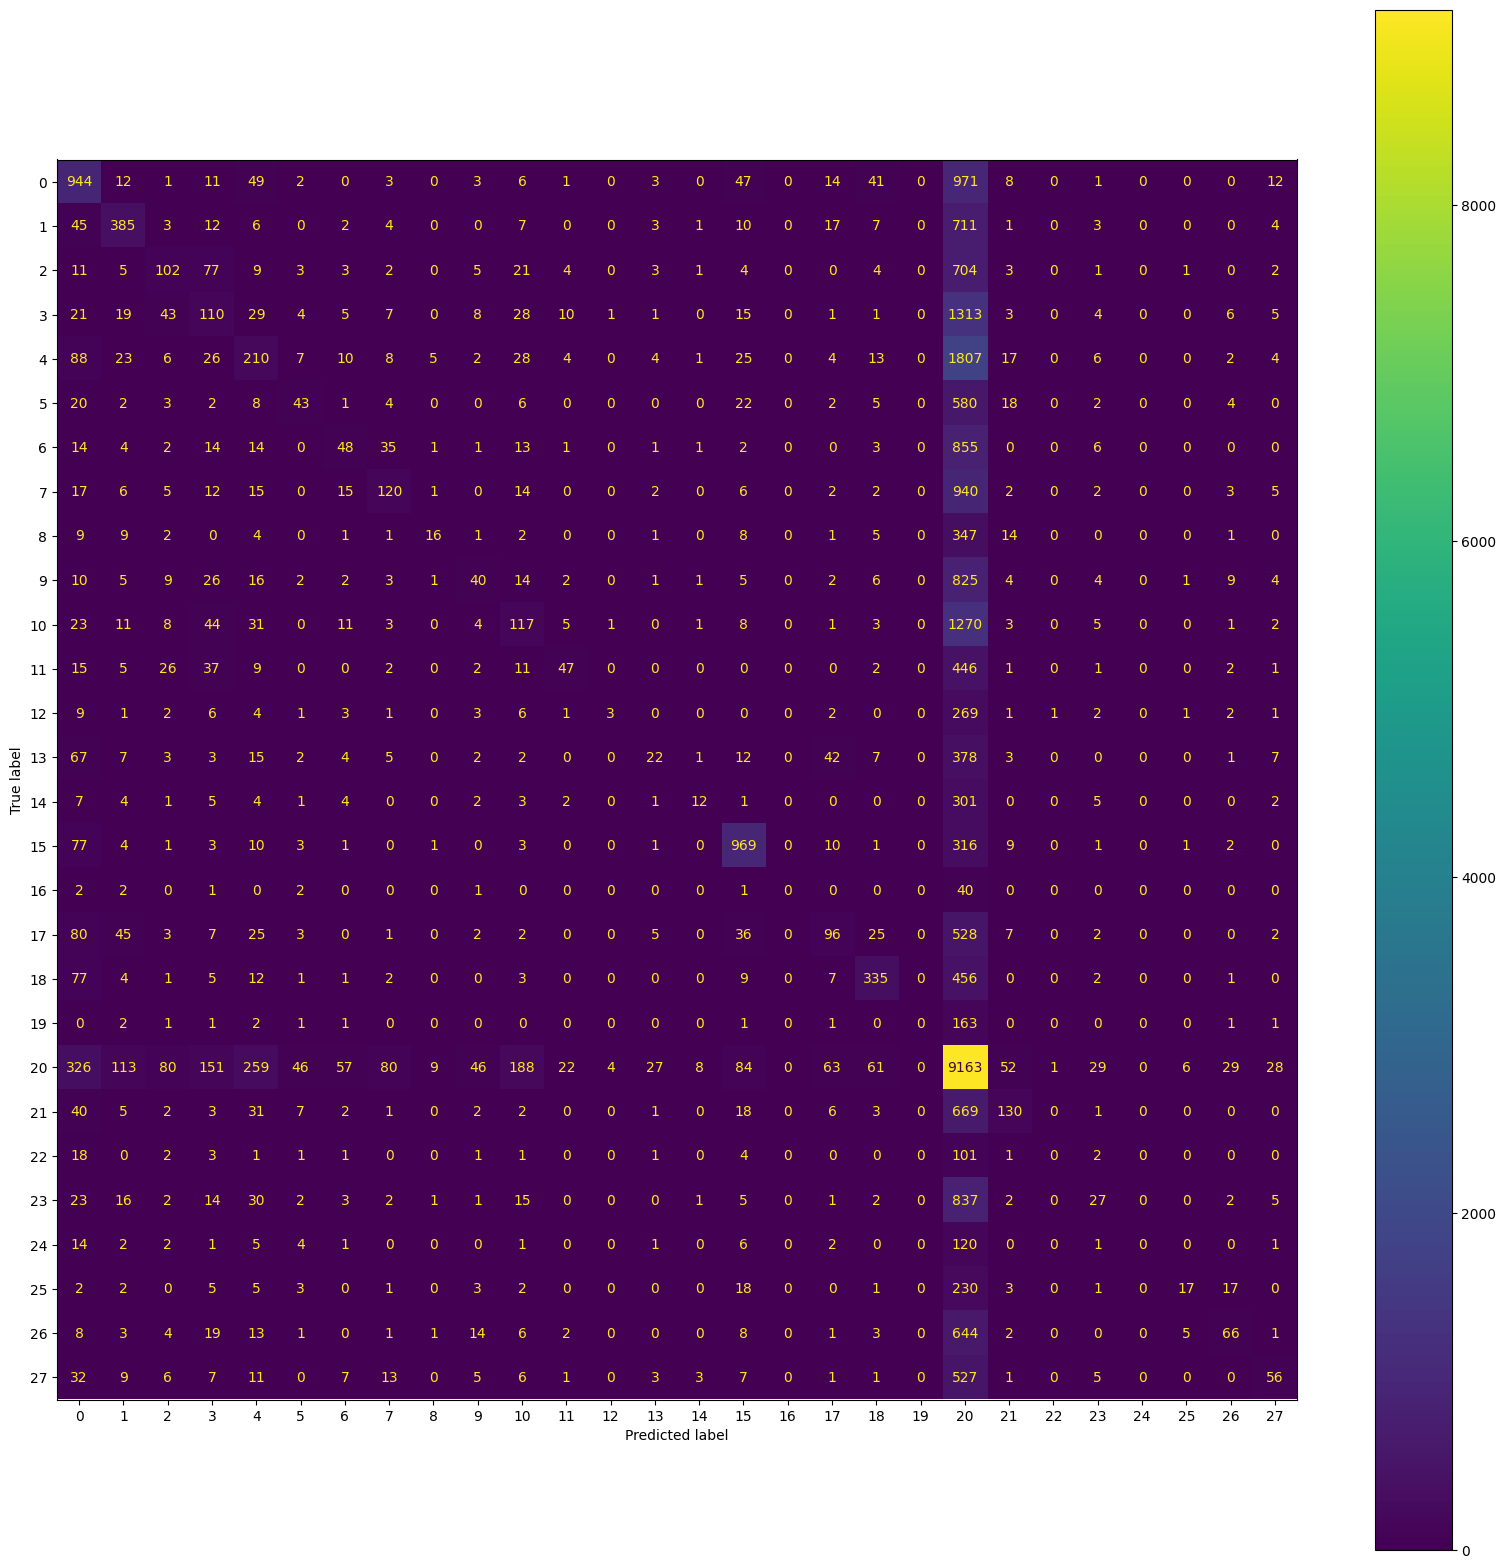

In [5]:
MNB = MultinomialNB()

#for emotions classification
MNBmodel = MNB.fit(X_train, Yemo_train)
pred = MNB.predict(X_test)

print("The performance of Multinomial naive bayes classifier with default parameters for emotions.\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax)

The performance of naive bayes classifier with default parameters for sentiments.

              precision    recall  f1-score   support

   ambiguous       0.42      0.25      0.31      3876
    negative       0.54      0.53      0.53      7760
     neutral       0.48      0.49      0.49     10932
    positive       0.62      0.71      0.66     11796

    accuracy                           0.55     34364
   macro avg       0.52      0.49      0.50     34364
weighted avg       0.54      0.55      0.54     34364



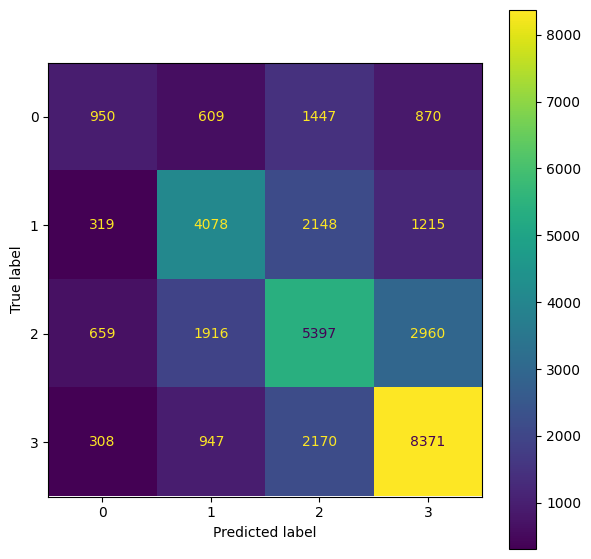

In [6]:
#for sentiments classification
MNBmodel = MNB.fit(X_train, Ysenti_train)
pred = MNB.predict(X_test)

print("The performance of naive bayes classifier with default parameters for sentiments.\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

## 2.3.2 Base-DT: a Decision Tree with default parameters.

In [7]:
from sklearn import tree
#2.3.2 Base DT for emotions:
baseDTCemo = tree.DecisionTreeClassifier()
baseDTCemo.fit(X_train, Yemo_train)

DecisionTreeClassifier()

In [8]:
y_emo_pred = baseDTCemo.predict(X_test)

In [9]:
#2.4 Performances for the emotion part (Base DT):
print("Base Decision Tree with default parameters for the emotion classification task:")

Base Decision Tree with default parameters for the emotion classification task:


Emotion classification task confusion matrix:


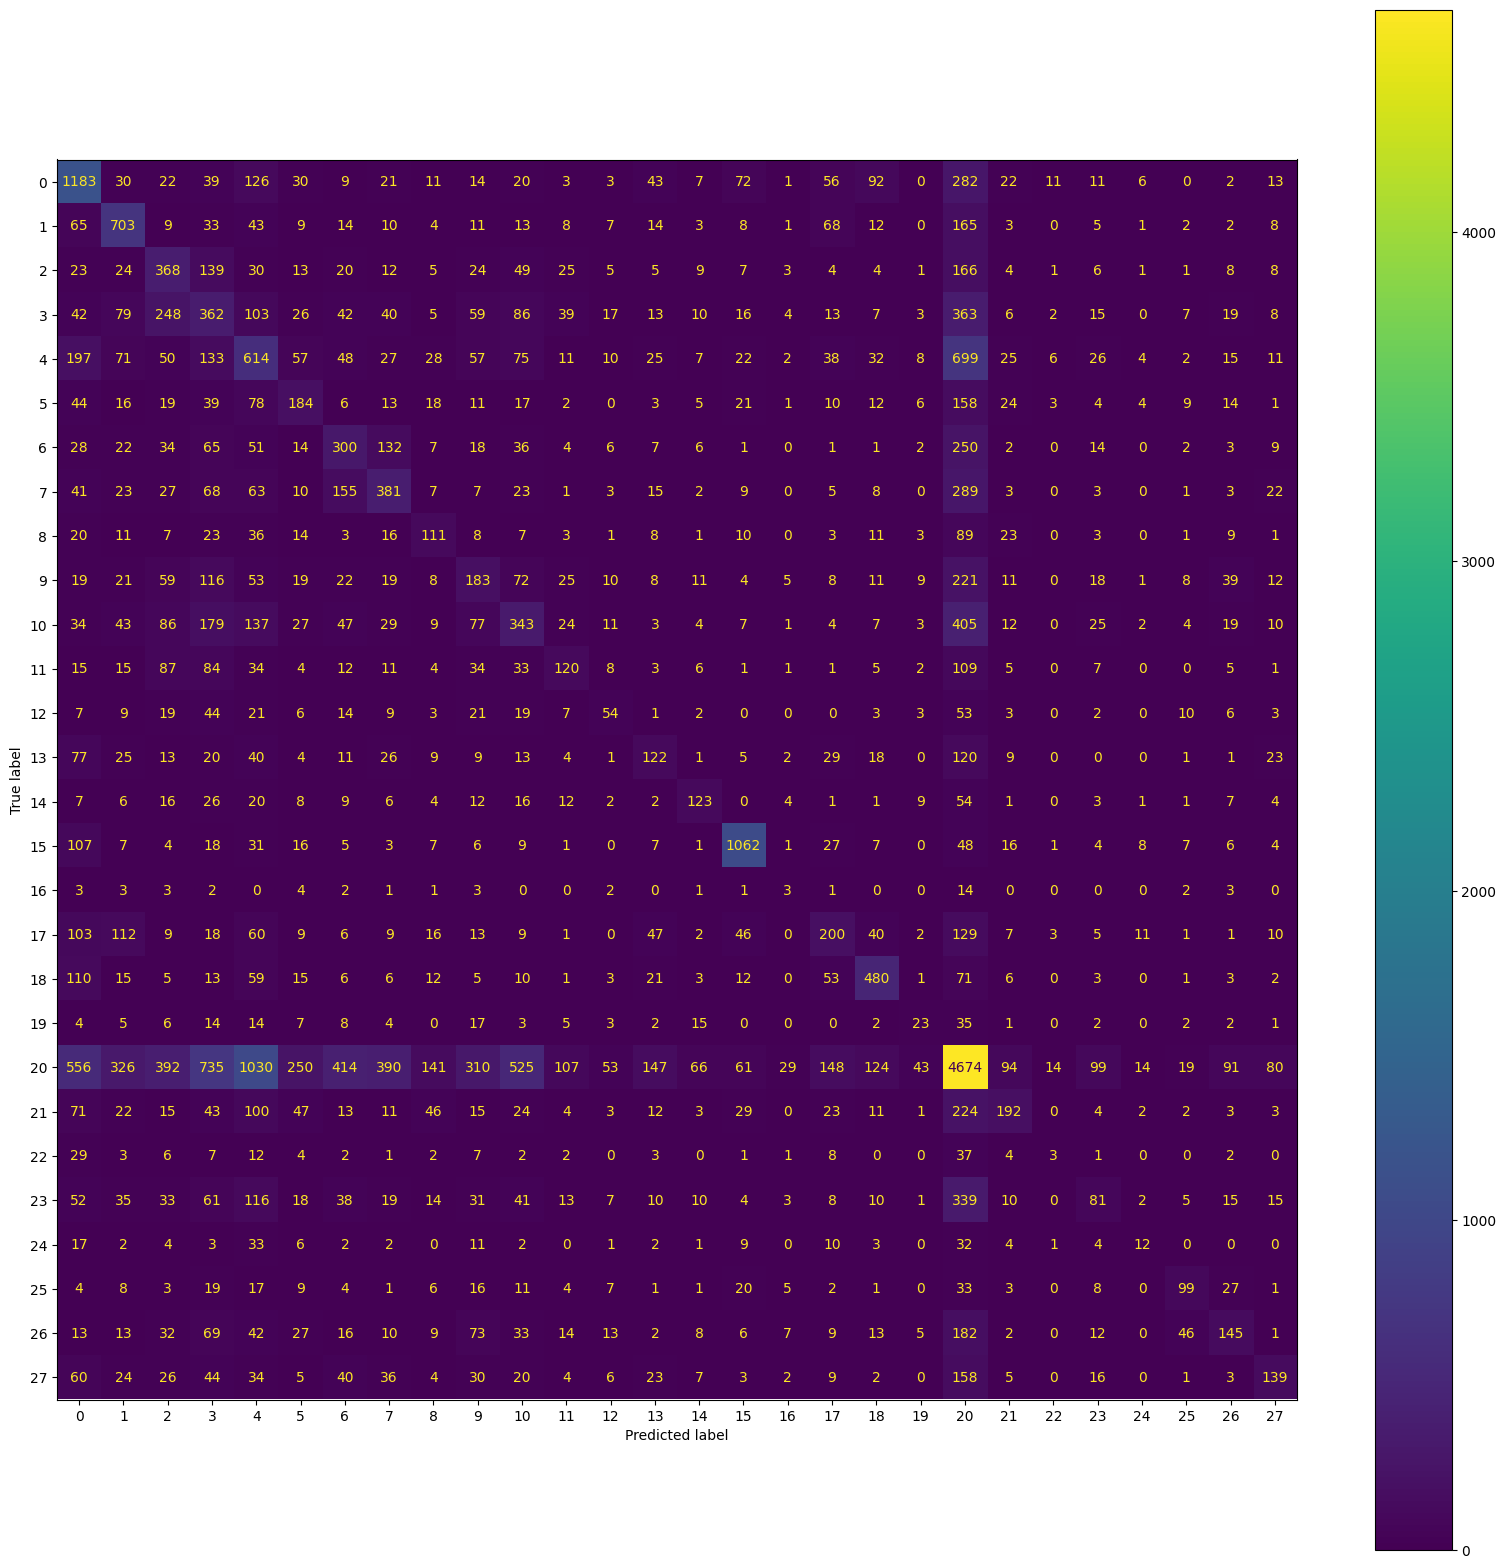

In [10]:
#The confusion matrix for it:
from sklearn.metrics import confusion_matrix
print("Emotion classification task confusion matrix:")
conf_mat = confusion_matrix(Yemo_test, y_emo_pred)
from sklearn.metrics import ConfusionMatrixDisplay
cmdisp = ConfusionMatrixDisplay(conf_mat)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
cmdisp.plot(ax = ax) 

In [11]:
#Classification Report:
from sklearn.metrics import classification_report
print(classification_report(Yemo_test, y_emo_pred))

                precision    recall  f1-score   support

    admiration       0.40      0.56      0.47      2129
     amusement       0.42      0.58      0.49      1221
         anger       0.23      0.38      0.29       965
     annoyance       0.15      0.22      0.18      1634
      approval       0.20      0.27      0.23      2300
        caring       0.22      0.25      0.24       722
     confusion       0.24      0.30      0.26      1015
     curiosity       0.31      0.33      0.32      1169
        desire       0.23      0.26      0.24       422
disappointment       0.17      0.18      0.18       992
   disapproval       0.23      0.22      0.22      1552
       disgust       0.27      0.20      0.23       607
 embarrassment       0.23      0.17      0.19       319
    excitement       0.22      0.21      0.22       583
          fear       0.39      0.35      0.37       355
     gratitude       0.74      0.75      0.75      1413
         grief       0.04      0.06      0.05  

In [12]:
from sklearn import tree
#2.3.2 Base DT for sentiment:
baseDTCsenti = tree.DecisionTreeClassifier()
baseDTCsenti.fit(X_train, Ysenti_train)

DecisionTreeClassifier()

In [13]:
y_senti_pred = baseDTCsenti.predict(X_test)

In [14]:
#2.4 Performances for the sentiment part:
print("Base Decision Tree with default parameters for the sentiment classification task:")

Base Decision Tree with default parameters for the sentiment classification task:


Sentiment classification task confusion matrix:


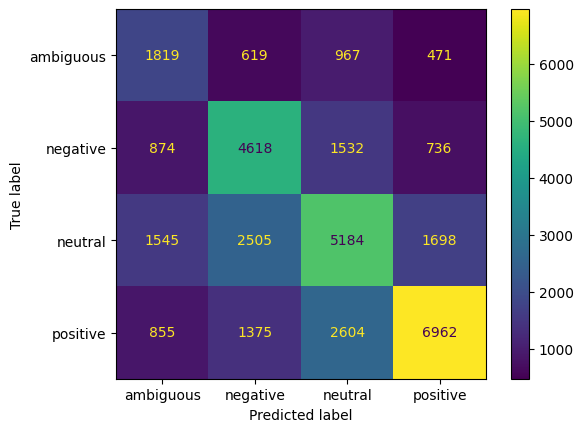

In [15]:
#The confusion matrix for it:
from sklearn.metrics import confusion_matrix
print("Sentiment classification task confusion matrix:")
confusion_matrix(Ysenti_test, y_senti_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(baseDTCsenti, X_test, Ysenti_test)

In [16]:
#Classification Report:
from sklearn.metrics import classification_report
print(classification_report(Ysenti_test, y_senti_pred))

              precision    recall  f1-score   support

   ambiguous       0.36      0.47      0.41      3876
    negative       0.51      0.60      0.55      7760
     neutral       0.50      0.47      0.49     10932
    positive       0.71      0.59      0.64     11796

    accuracy                           0.54     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.56      0.54      0.55     34364



## 2.3.3 Base-MLP: a Multi-Layered Perceptron with the default parameters.

In [6]:
clf_obj = MLPClassifier(max_iter = 1)


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


The performance of Multilayer Perceptron with default parameters for emotions.

              precision    recall  f1-score   support

           0       0.49      0.53      0.51      2219
           1       0.47      0.56      0.51      1222
           2       0.35      0.29      0.31      1036
           3       0.19      0.16      0.17      1596
           4       0.25      0.14      0.18      2312
           5       0.25      0.17      0.20       712
           6       0.24      0.18      0.20      1006
           7       0.33      0.29      0.31      1142
           8       0.34      0.28      0.31       496
           9       0.21      0.15      0.18       940
          10       0.24      0.20      0.22      1522
          11       0.23      0.24      0.24       604
          12       0.25      0.19      0.21       307
          13       0.23      0.17      0.20       592
          14       0.41      0.38      0.40       353
          15       0.77      0.74      0.75      1394
 

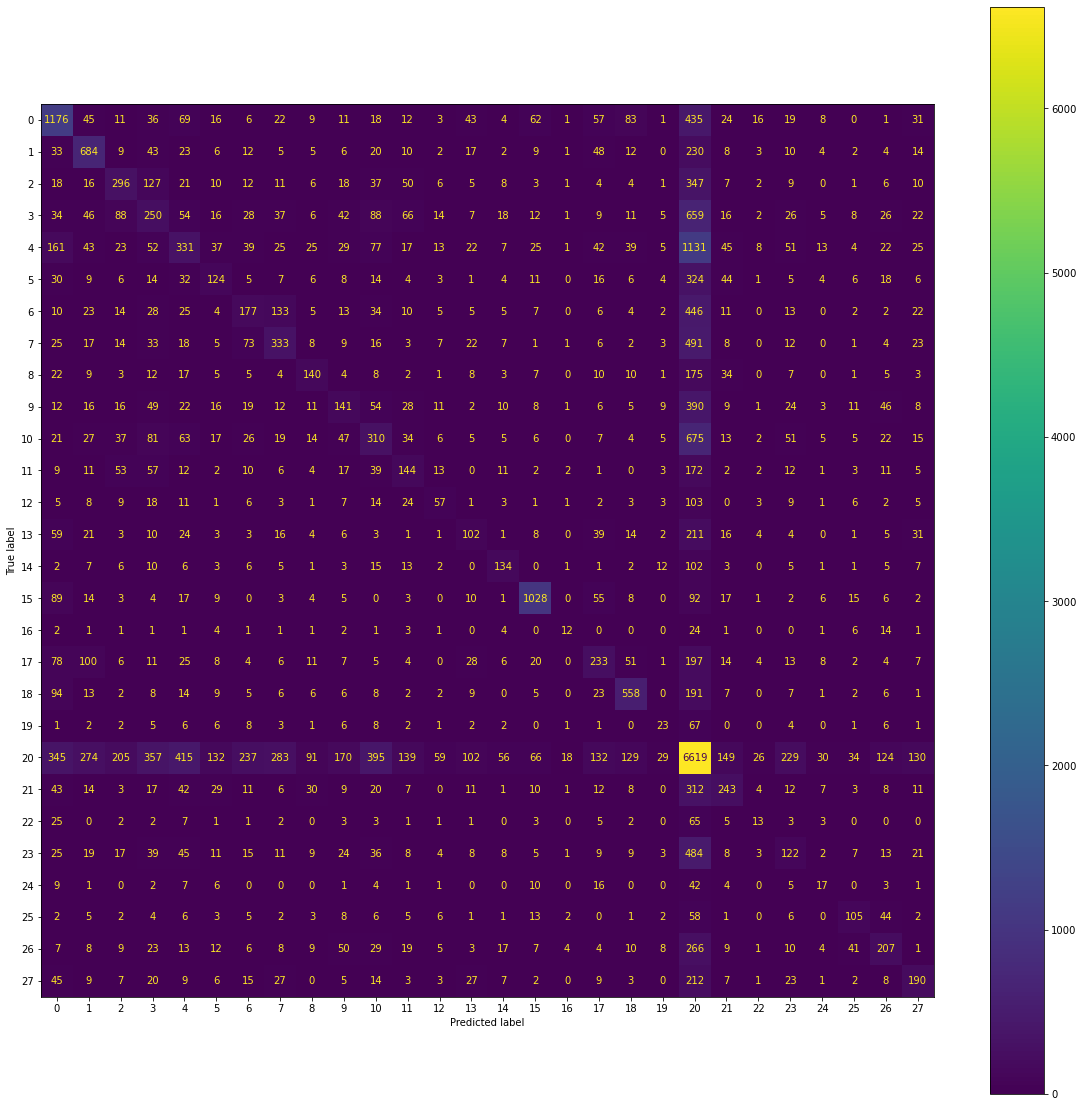

In [9]:
clf_obj.fit(X_train,Yemo_train)#training the data of emotions
pred = clf_obj.predict(X_test)

print("The performance of Multilayer Perceptron with default parameters for emotions.\n")
print(classification_report(Yemo_test, pred)) 
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptrons classifier with default parameters for sentiments.

              precision    recall  f1-score   support

           0       0.46      0.23      0.31      3828
           1       0.57      0.51      0.54      7720
           2       0.48      0.61      0.54     11118
           3       0.69      0.67      0.68     11698

    accuracy                           0.57     34364
   macro avg       0.55      0.51      0.52     34364
weighted avg       0.57      0.57      0.56     34364



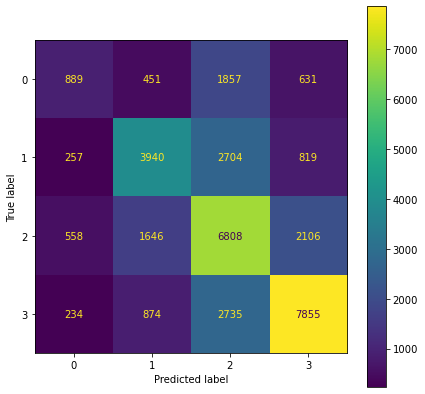

In [5]:
clf_obj.fit(X_train,Ysenti_train) #training the data of sentiments
pred = clf_obj.predict(X_test)

print("The performance of Multilayer Perceptrons classifier with default parameters for sentiments.\n")
print(classification_report(Ysenti_test, pred)) 
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax) 


## 2.3.4 Top-MNB: a better performing Multinomial Naive Bayes found using GridSearchCV.

c:\python3.8\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


The performance of naive bayes classifier with best hyper-parameters for emotions.

The best hyper-parameter value is : {'alpha': 0}

                precision    recall  f1-score   support

    admiration       0.46      0.50      0.48      2129
     amusement       0.46      0.56      0.50      1221
         anger       0.27      0.32      0.30       965
     annoyance       0.19      0.14      0.16      1634
      approval       0.24      0.15      0.19      2300
        caring       0.20      0.27      0.23       722
     confusion       0.23      0.23      0.23      1015
     curiosity       0.29      0.28      0.29      1169
        desire       0.24      0.30      0.27       422
disappointment       0.19      0.14      0.16       992
   disapproval       0.22      0.19      0.20      1552
       disgust       0.23      0.25      0.24       607
 embarrassment       0.20      0.24      0.22       319
    excitement       0.19      0.20      0.19       583
          fear       0.32

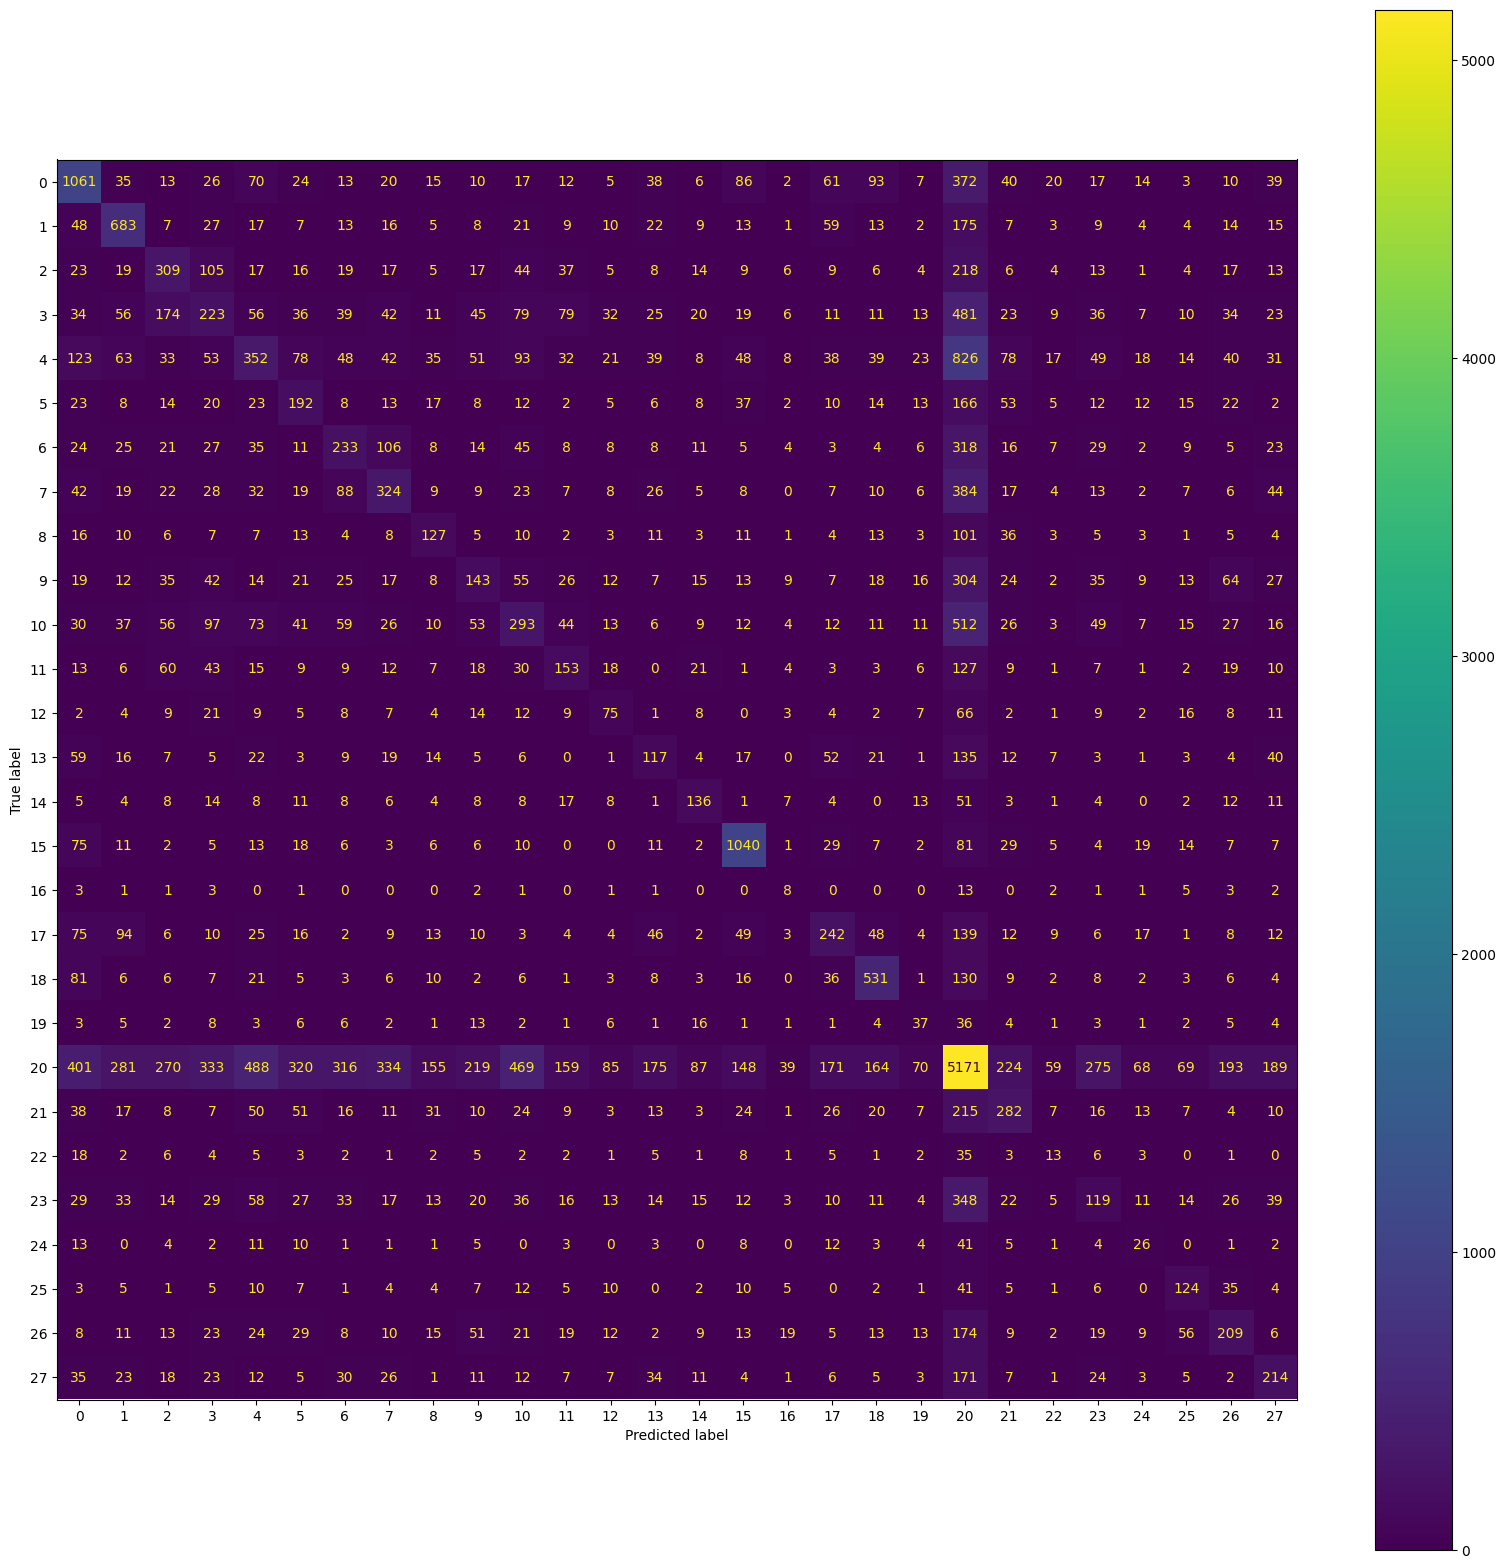

In [17]:
MNB = MultinomialNB()

#For emotions classification
parameters = {"alpha":(2, 1, 0.5, 0)}
gs = GridSearchCV(estimator = MNB, param_grid = parameters, n_jobs = -1, refit = True, scoring = "f1_weighted")
gs.fit(X_train, Yemo_train)
pred = gs.best_estimator_.predict(X_test)

print("The performance of naive bayes classifier with best hyper-parameters for emotions.\n")
print(f"The best hyper-parameter value is : {gs.best_params_}\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax)

The performance of naive bayes classifier with best hyper-parameters for sentiments.

The best hyper-parameter value is : {'alpha': 0.5}

              precision    recall  f1-score   support

   ambiguous       0.40      0.29      0.34      3876
    negative       0.53      0.54      0.53      7760
     neutral       0.49      0.47      0.48     10932
    positive       0.63      0.70      0.66     11796

    accuracy                           0.55     34364
   macro avg       0.51      0.50      0.50     34364
weighted avg       0.54      0.55      0.54     34364



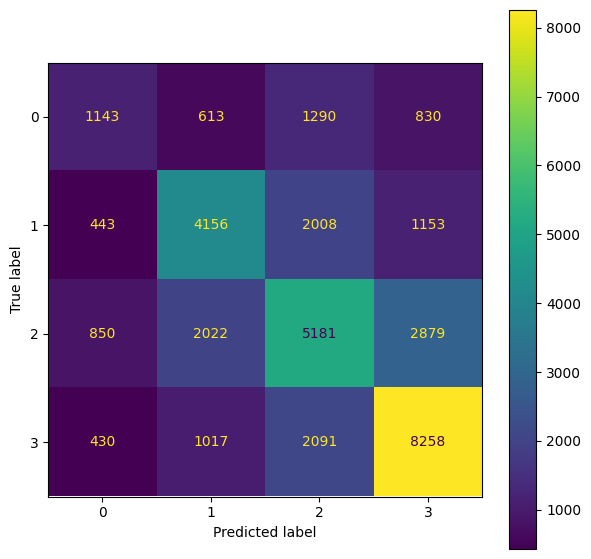

In [18]:
MNB = MultinomialNB()

#for sentiments classification
parameters = {"alpha":(2, 1, 0.5, 0)}
gs = GridSearchCV(estimator = MNB, param_grid = parameters, n_jobs = -1, refit = True, scoring = "f1_weighted")
gs.fit(X_train, Ysenti_train)
pred = gs.best_estimator_.predict(X_test)

print("The performance of naive bayes classifier with best hyper-parameters for sentiments.\n")
print(f"The best hyper-parameter value is : {gs.best_params_}\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

## 2.3.5 Top-DT: a better performing Decision Tree found using GridSearchCV.

In [19]:
from sklearn import tree
#2.3.5 Top DT for emotions:
topDTCemo = tree.DecisionTreeClassifier(criterion = "entropy" ,  max_depth = 25, min_samples_split = 4)
topDTCemo.fit(X_train, Yemo_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=4)

In [20]:
y_emo_pred_top = topDTCemo.predict(X_test)

In [21]:
#Making a parameter for the param_grid part of the GridSearchCV function:
parameters_for_the_grid_emo = {
    "criterion" : ["gini" , "entropy"] , 
    "max_depth" : [25, 50], 
    "min_samples_split" : [4 , 7 , 10]
}

In [22]:
from sklearn.model_selection import GridSearchCV
gSCVemo = GridSearchCV(estimator = topDTCemo, param_grid = parameters_for_the_grid_emo)
#Fitting the instance
gSCVemo.fit(X_train, Yemo_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=25,
                                              min_samples_split=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 50],
                         'min_samples_split': [4, 7, 10]})

In [23]:
#2.4 Performances for the emotion part (Top DT):
print("Top Decision Tree with hyperparameters for the emotion classification task:")

Top Decision Tree with hyperparameters for the emotion classification task:


Emotion classification task confusion matrix:


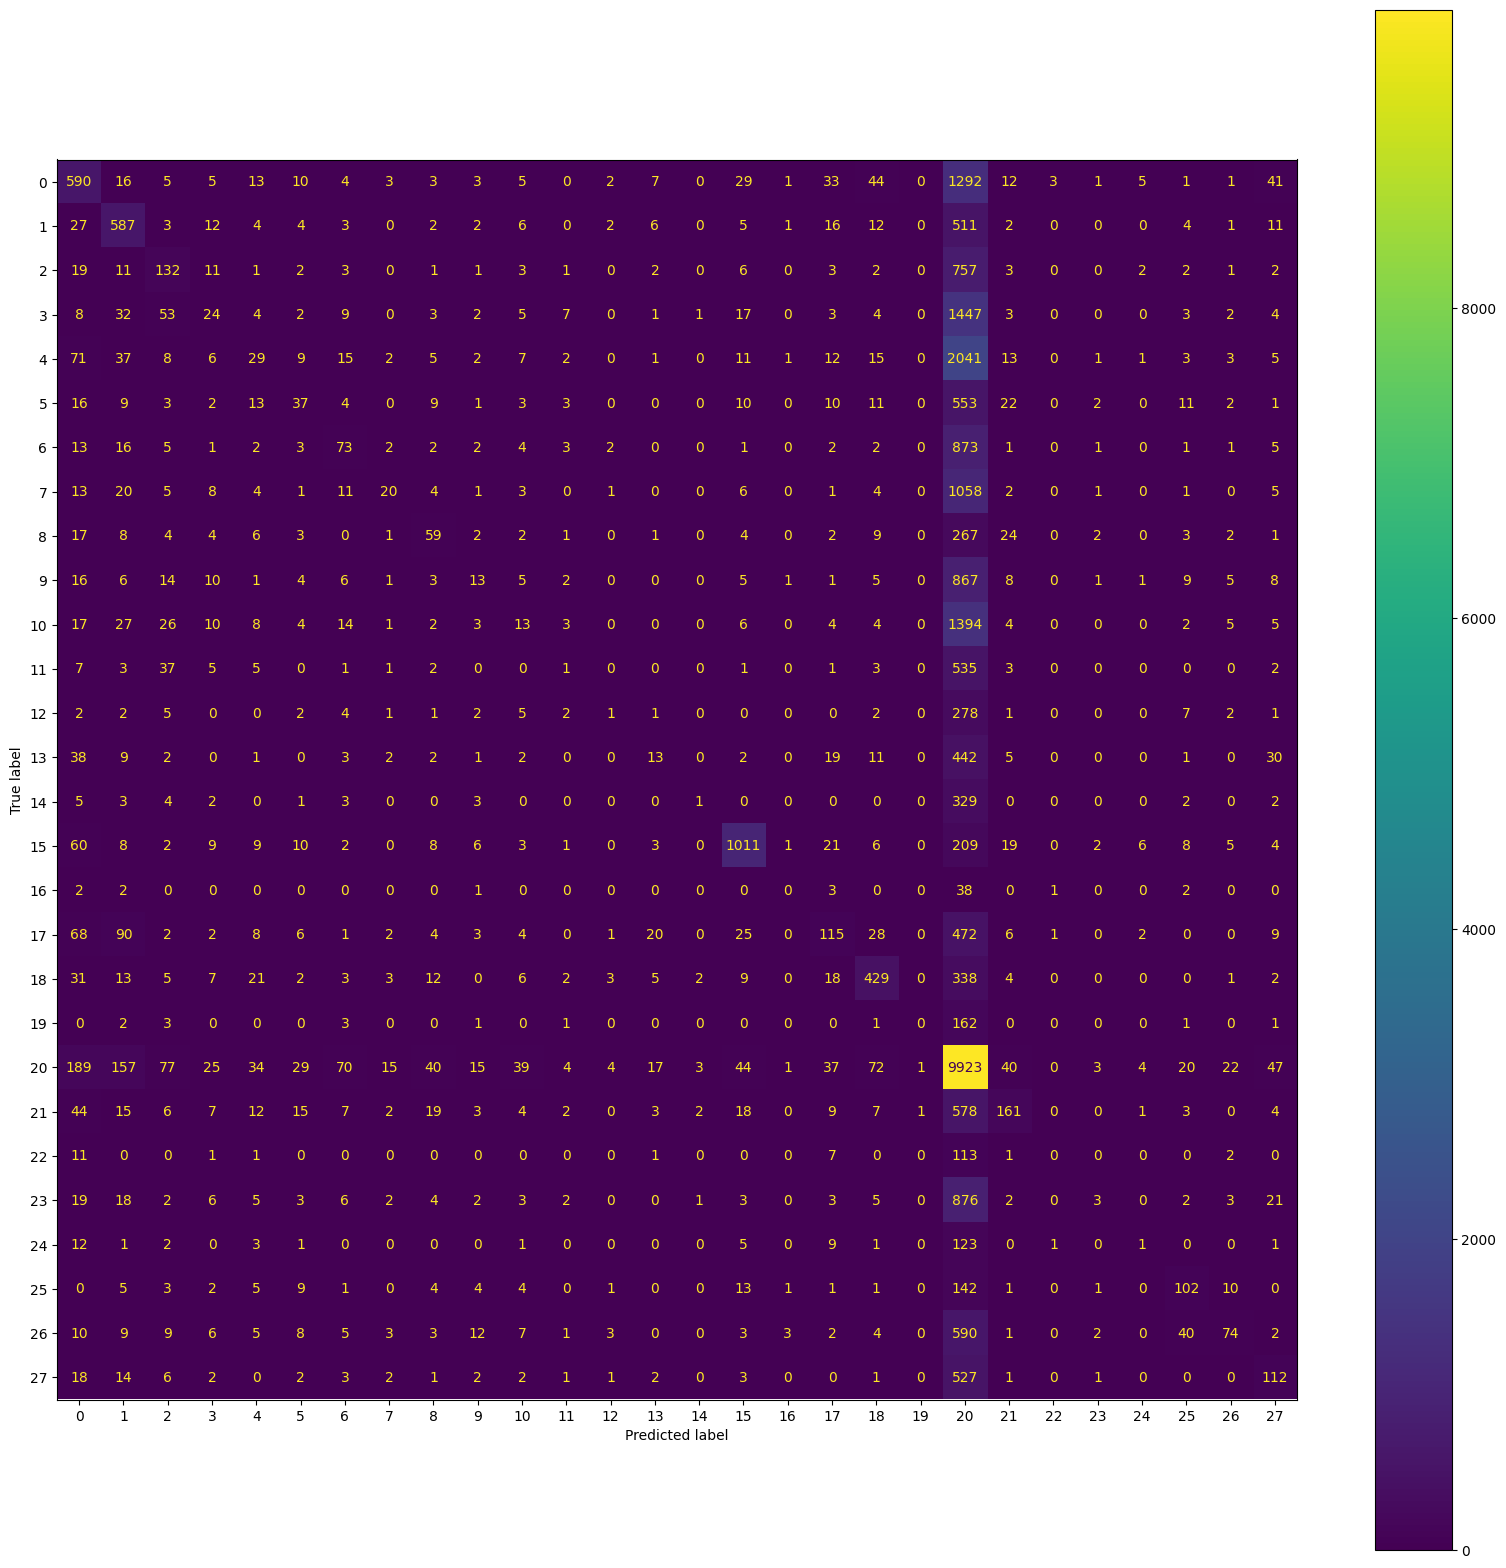

In [24]:
#The confusion matrix for it:
from sklearn.metrics import confusion_matrix
print("Emotion classification task confusion matrix:")
conf_mat_top = confusion_matrix(Yemo_test, y_emo_pred_top)
from sklearn.metrics import ConfusionMatrixDisplay
cmdisp_top = ConfusionMatrixDisplay(conf_mat_top)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
cmdisp_top.plot(ax = ax)

In [25]:
#Classification Report:
from sklearn.metrics import classification_report
print(classification_report(Yemo_test, y_emo_pred_top))

                precision    recall  f1-score   support

    admiration       0.45      0.28      0.34      2129
     amusement       0.52      0.48      0.50      1221
         anger       0.31      0.14      0.19       965
     annoyance       0.14      0.01      0.03      1634
      approval       0.15      0.01      0.02      2300
        caring       0.22      0.05      0.08       722
     confusion       0.29      0.07      0.12      1015
     curiosity       0.32      0.02      0.03      1169
        desire       0.31      0.14      0.19       422
disappointment       0.15      0.01      0.02       992
   disapproval       0.10      0.01      0.02      1552
       disgust       0.03      0.00      0.00       607
 embarrassment       0.05      0.00      0.01       319
    excitement       0.16      0.02      0.04       583
          fear       0.10      0.00      0.01       355
     gratitude       0.82      0.72      0.76      1413
         grief       0.00      0.00      0.00  

In [26]:
from sklearn import tree
#2.3.5 Base DT for sentiments:
topDTCsenti = tree.DecisionTreeClassifier()
topDTCsenti.fit(X_train, Ysenti_train)

DecisionTreeClassifier()

In [27]:
y_senti_pred_top = topDTCsenti.predict(X_test)

In [28]:
#Making a parameter for the param_grid part of the GridSearchCV function:
parameters_for_the_grid_senti = {
    "criterion" : ["gini" , "entropy"] , 
    "max_depth" : [25, 50], 
    "min_samples_split" : [4 , 7 , 10]
}

In [29]:
from sklearn.model_selection import GridSearchCV
gSCVsenti = GridSearchCV(estimator = topDTCsenti, param_grid = parameters_for_the_grid_senti)
#Fitting the instance
gSCVsenti.fit(X_train, Ysenti_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 50],
                         'min_samples_split': [4, 7, 10]})

In [30]:
#2.4 Performances for the sentiment part (Top DT):
print("Top Decision Tree with hyperparameters for the sentiment classification task:")

Top Decision Tree with hyperparameters for the sentiment classification task:


Sentiment classification task confusion matrix:


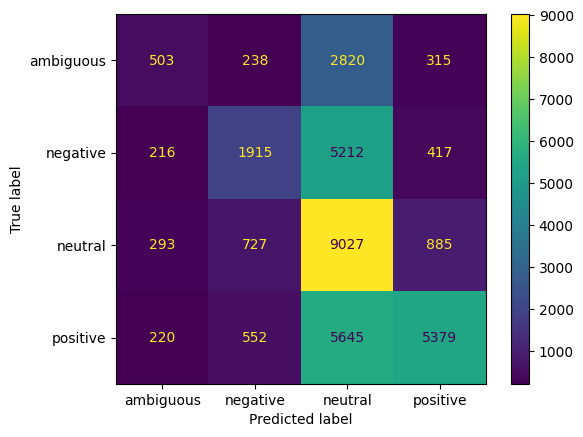

In [31]:
#The confusion matrix for it:
from sklearn.metrics import confusion_matrix
print("Sentiment classification task confusion matrix:")
confusion_matrix(Ysenti_test, y_senti_pred_top)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gSCVsenti, X_test, Ysenti_test)

In [32]:
#Classification Report:
from sklearn.metrics import classification_report
print(classification_report(Ysenti_test, y_senti_pred_top))

              precision    recall  f1-score   support

   ambiguous       0.36      0.47      0.41      3876
    negative       0.51      0.60      0.55      7760
     neutral       0.50      0.47      0.49     10932
    positive       0.71      0.59      0.64     11796

    accuracy                           0.54     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.56      0.54      0.55     34364



## 2.3.6 Top-MLP: a better performing Multi-Layered Perceptron found using GridSearchCV.

In [5]:
param_grid=[
    { 'activation': ['logistic','tanh','relu','identity'], 'hidden_layer_sizes':[(30,50),(10,10,10)], 'solver':['adam','sgd']}
]


In [ ]:
#training the data of emotions using GridSearchCV
grid_search = GridSearchCV(clf_obj, param_grid, scoring='f1_weighted').fit(X_train,Yemo_train)
print("The best parameter is:  ")
print(grid_search.best_params_)


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.51      0.53      0.52      2096
           1       0.54      0.64      0.59      1213
           2       0.40      0.20      0.27      1074
           3       0.24      0.01      0.03      1694
           4       0.45      0.05      0.09      2240
           5       0.24      0.04      0.07       702
           6       0.32      0.07      0.11      1018
           7       0.33      0.13      0.19      1203
           8       0.49      0.16      0.24       459
           9       0.17      0.01      0.02       987
          10       0.26      0.03      0.05      1554
          11       0.37      0.14      0.20       584
          12       0.00      0.00      0.00       298
          13       0.55      0.07      0.12       558
          14       0.58      0.13      0.21       319
          15       0.77      0.77      0.77      1428
          16       0.00      0.00      0.00        77
          17       0.37    

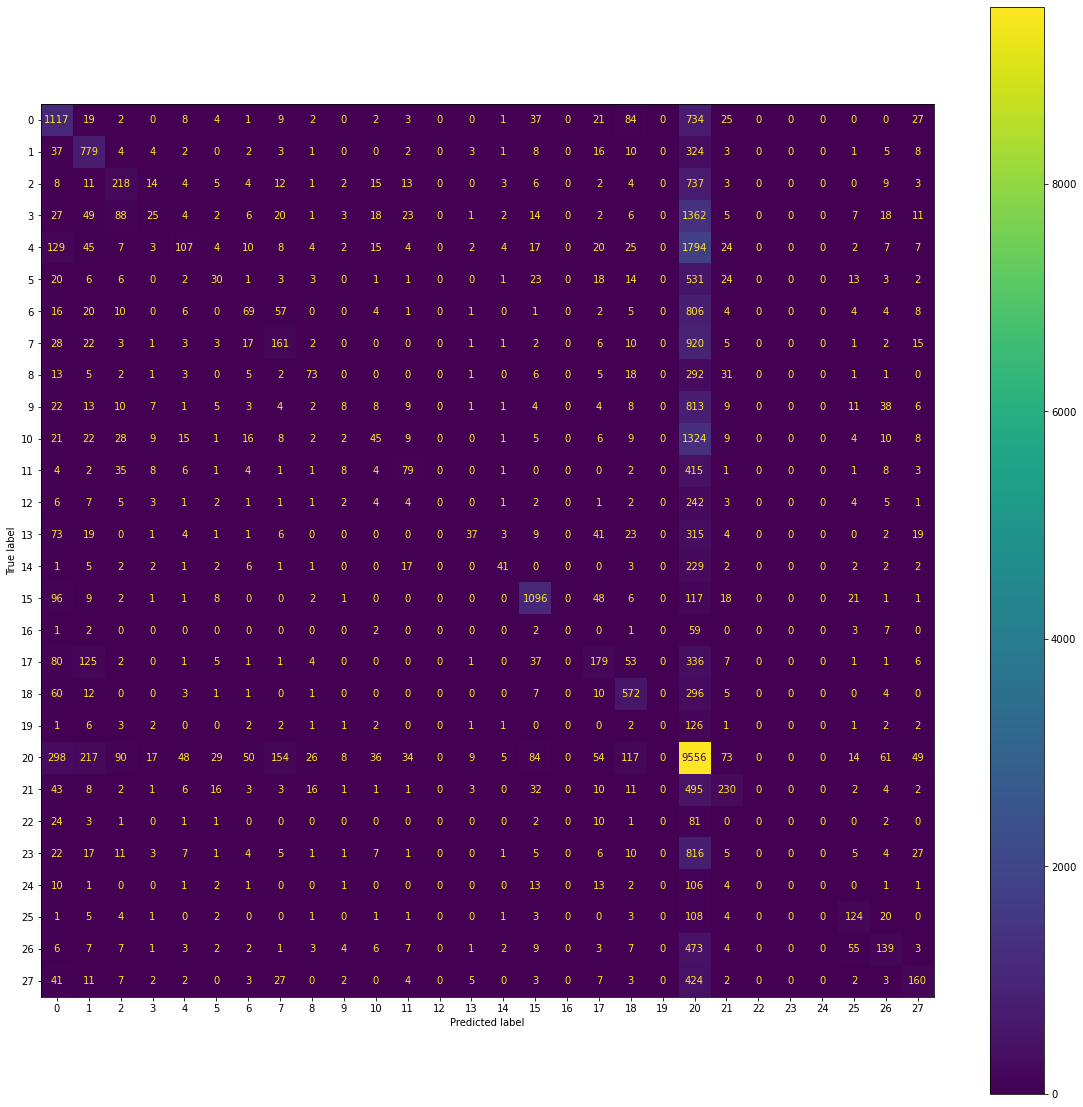

In [26]:
pred = grid_search.predict(X_test)

print(classification_report(Yemo_test, pred))

cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 

In [7]:
#training the data of sentiments using GridSearchCV
grid_search = GridSearchCV(clf_obj, param_grid, scoring='f1_weighted').fit(X_train,Ysenti_train)
print("The best parameter is:  ")
print(grid_search.best_params_)


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

The best parameter is:  
{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.45      0.22      0.30      3783
           1       0.55      0.55      0.55      7794
           2       0.49      0.57      0.52     11020
           3       0.67      0.68      0.68     11767

    accuracy                           0.56     34364
   macro avg       0.54      0.51      0.51     34364
weighted avg       0.56      0.56      0.56     34364



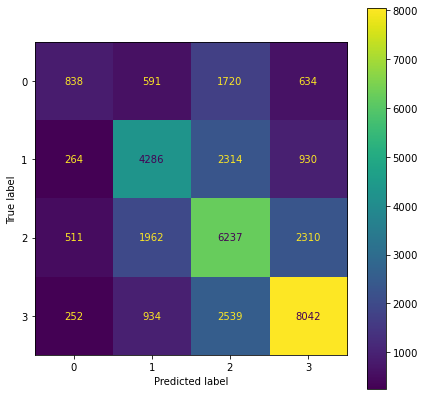

In [9]:
pred = grid_search.predict(X_test)

print(classification_report(Ysenti_test, pred))

cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax) 

# 2.5 Different train-test-split

We are using 50% training set and 50% test set, In this case the accuracy and other metrics would slightly change or decrease,because the test size is bigger as compared to previous section and train size is small, the downside is that, the model would not be generalized because of less training and data.

In [33]:
X_train, X_test, Yemo_train, Yemo_test, Ysenti_train, Ysenti_test = train_test_split(X, emo, senti, test_size = 0.5, train_size=0.5)

## 2.3.1 Base-MNB: a Multinomial Naive Bayes Classification with default parameters.

The performance of Multinomial naive bayes classifier with default parameters for emotions.

              precision    recall  f1-score   support

           0       0.49      0.37      0.42      5165
           1       0.56      0.20      0.30      3027
           2       0.37      0.07      0.12      2596
           3       0.19      0.04      0.07      4107
           4       0.22      0.06      0.10      5623
           5       0.30      0.03      0.05      1759
           6       0.30      0.03      0.05      2450
           7       0.40      0.05      0.09      2964
           8       0.37      0.02      0.03      1045
           9       0.26      0.02      0.04      2398
          10       0.23      0.04      0.07      3839
          11       0.49      0.04      0.07      1461
          12       0.00      0.00      0.00       746
          13       0.28      0.02      0.03      1532
          14       0.31      0.01      0.02       884
          15       0.80      0.57      0.6

c:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


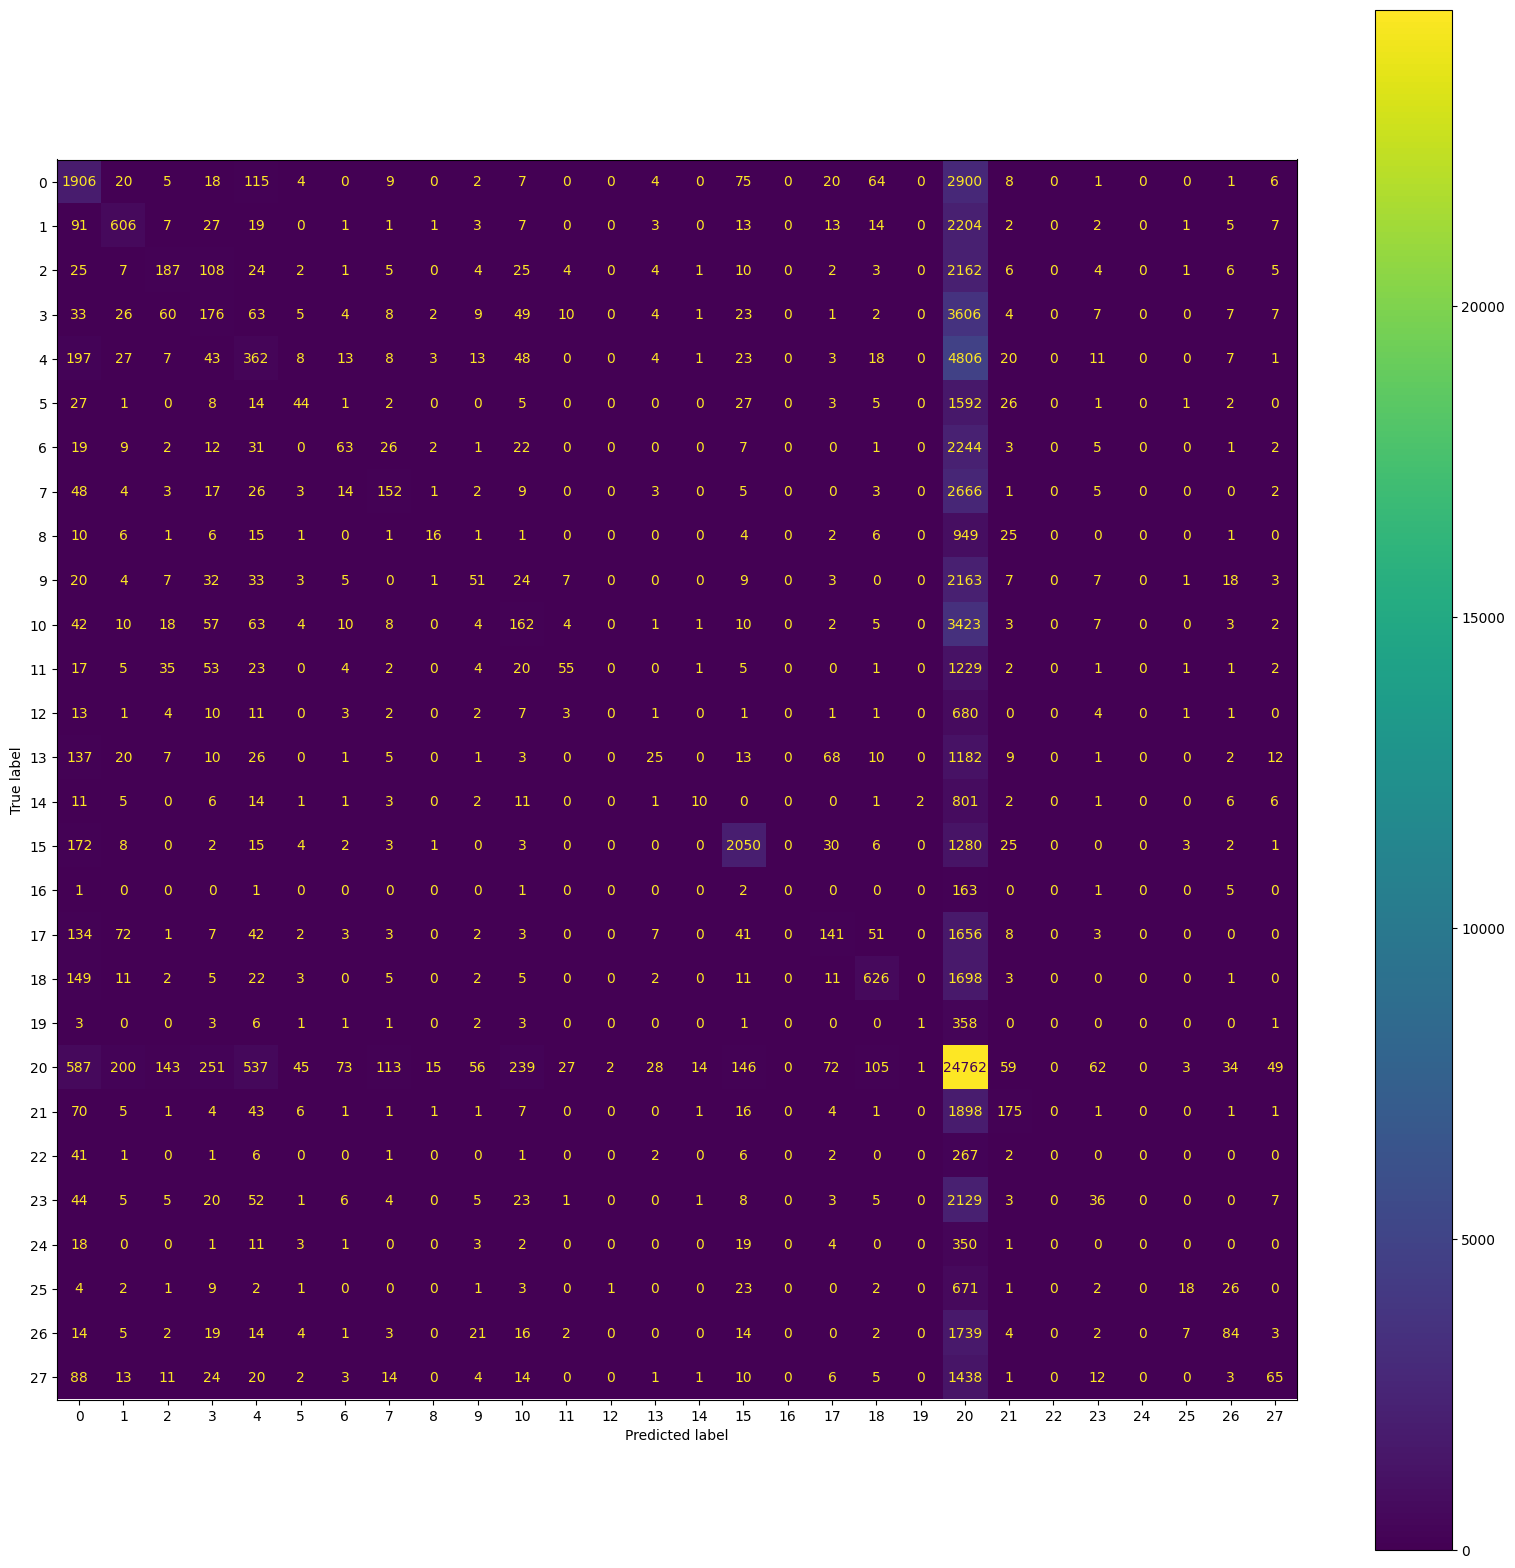

In [34]:
MNB = MultinomialNB()

#for emotions classification
MNBmodel = MNB.fit(X_train, Yemo_train)
pred = MNB.predict(X_test)

print("The performance of Multinomial naive bayes classifier with default parameters for emotions.\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax)

The performance of naive bayes classifier with default parameters for sentiments.

              precision    recall  f1-score   support

           0       0.42      0.19      0.26      9507
           1       0.53      0.49      0.51     19309
           2       0.47      0.49      0.48     27623
           3       0.60      0.71      0.65     29471

    accuracy                           0.53     85910
   macro avg       0.51      0.47      0.48     85910
weighted avg       0.52      0.53      0.52     85910



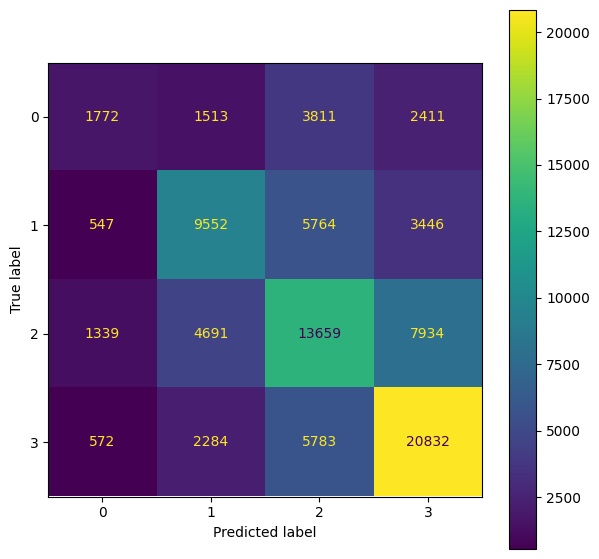

In [35]:
#for sentiments classification
MNBmodel = MNB.fit(X_train, Ysenti_train)
pred = MNB.predict(X_test)

print("The performance of naive bayes classifier with default parameters for sentiments.\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

## 2.3.2 Base-DT: a Decision Tree with default parameters.

In [36]:
from sklearn import tree
#2.3.2 Base DT for emotions:
baseDTCemo = tree.DecisionTreeClassifier()
baseDTCemo.fit(X_train, Yemo_train)

DecisionTreeClassifier()

In [37]:
y_emo_pred = baseDTCemo.predict(X_test)

In [38]:
#2.4 Performances for the emotion part (Base DT):
print("Base Decision Tree with default parameters for the emotion classification task:")

Base Decision Tree with default parameters for the emotion classification task:


Emotion classification task confusion matrix:


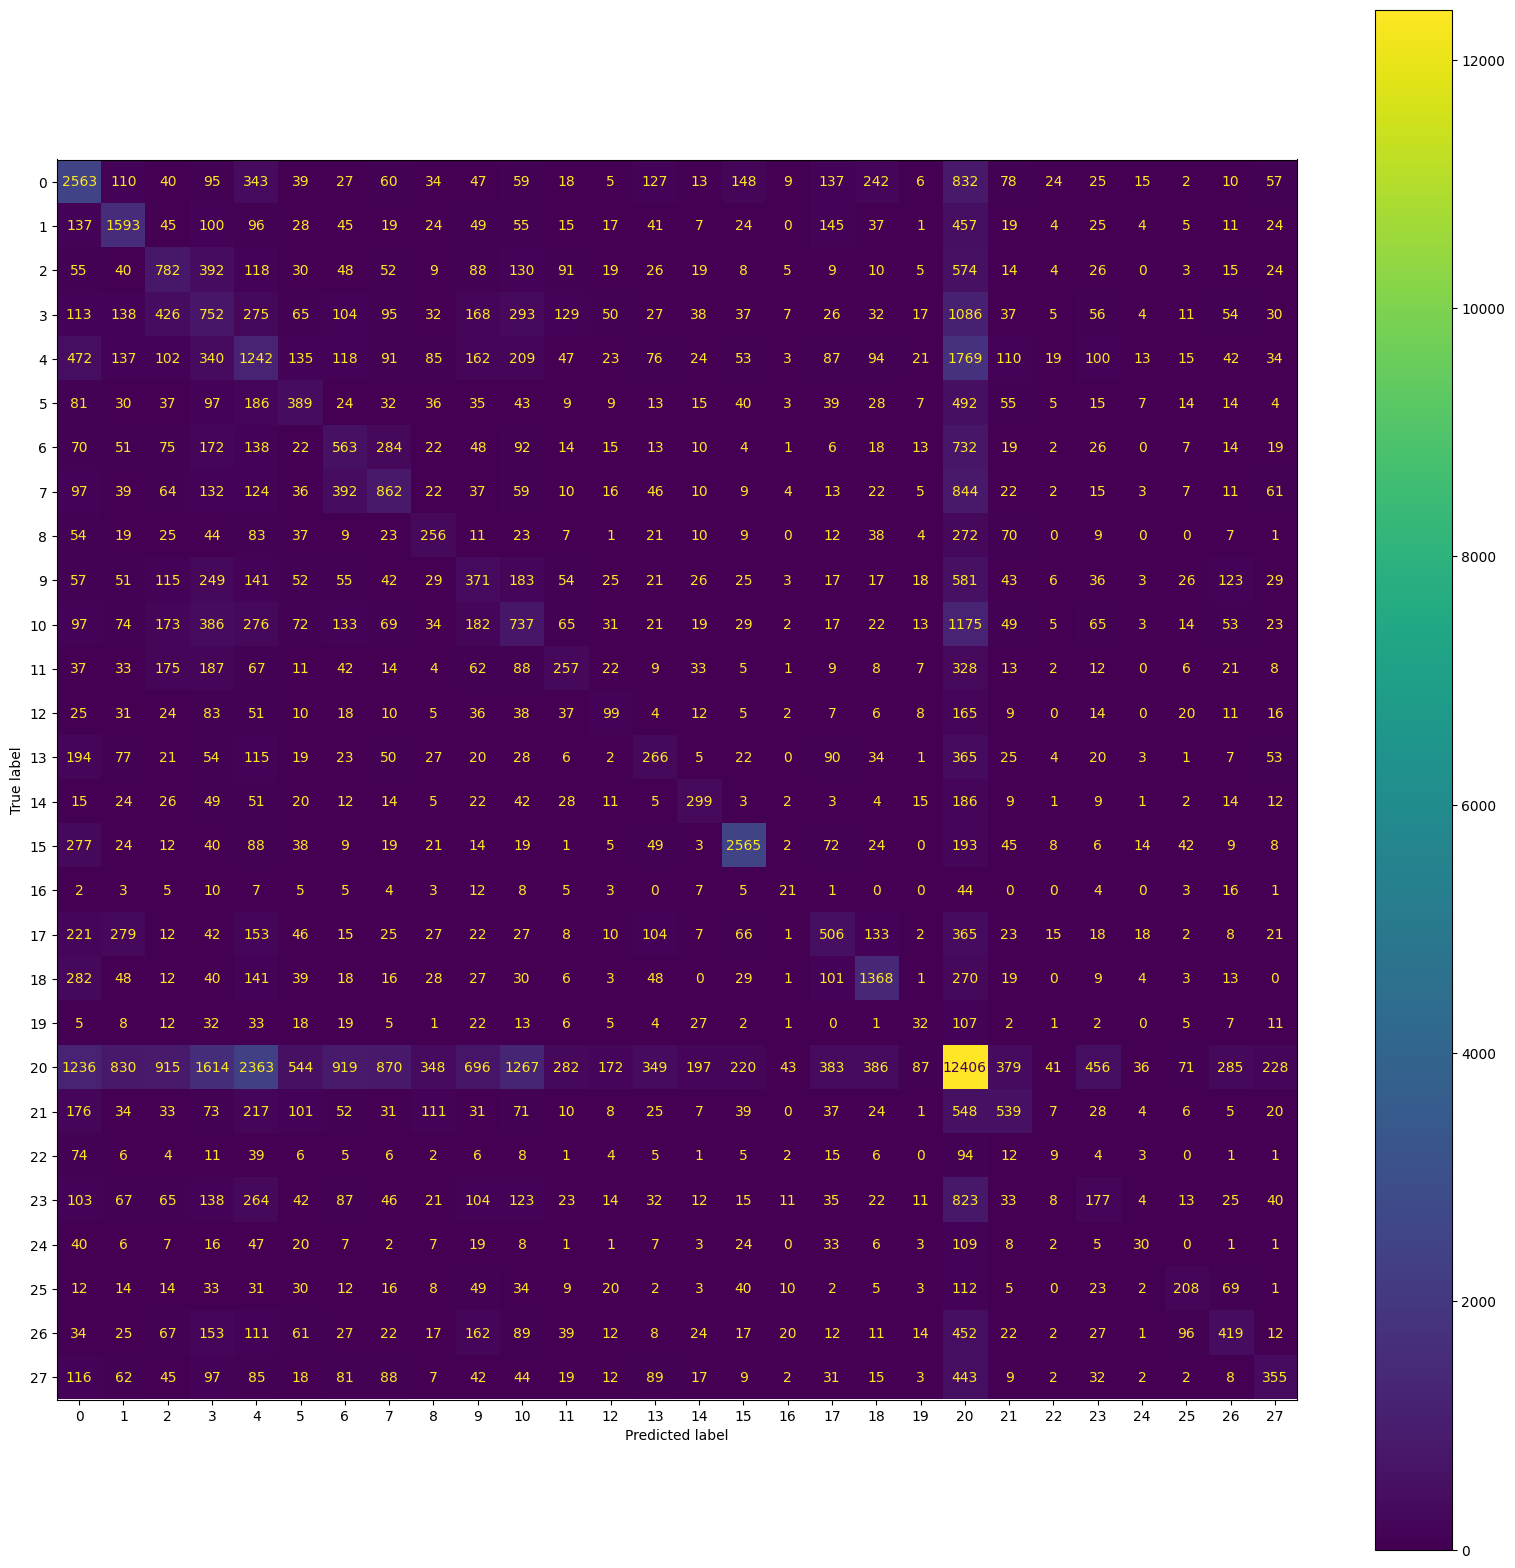

In [39]:
#The confusion matrix for it:
from sklearn.metrics import confusion_matrix
print("Emotion classification task confusion matrix:")
conf_mat = confusion_matrix(Yemo_test, y_emo_pred)
from sklearn.metrics import ConfusionMatrixDisplay
cmdisp = ConfusionMatrixDisplay(conf_mat)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
cmdisp.plot(ax = ax) 

In [40]:
#Classification Report:
from sklearn.metrics import classification_report
print(classification_report(Yemo_test, y_emo_pred))

              precision    recall  f1-score   support

           0       0.39      0.50      0.43      5165
           1       0.41      0.53      0.46      3027
           2       0.23      0.30      0.26      2596
           3       0.14      0.18      0.16      4107
           4       0.18      0.22      0.20      5623
           5       0.20      0.22      0.21      1759
           6       0.20      0.23      0.21      2450
           7       0.30      0.29      0.30      2964
           8       0.21      0.24      0.23      1045
           9       0.15      0.15      0.15      2398
          10       0.19      0.19      0.19      3839
          11       0.21      0.18      0.19      1461
          12       0.16      0.13      0.15       746
          13       0.18      0.17      0.18      1532
          14       0.35      0.34      0.35       884
          15       0.74      0.71      0.73      3607
          16       0.13      0.12      0.13       174
          17       0.27    

In [41]:
from sklearn import tree
#2.3.2 Base DT for sentiment:
baseDTCsenti = tree.DecisionTreeClassifier()
baseDTCsenti.fit(X_train, Ysenti_train)

DecisionTreeClassifier()

In [42]:
y_senti_pred = baseDTCsenti.predict(X_test)

In [43]:
#2.4 Performances for the sentiment part:
print("Base Decision Tree with default parameters for the sentiment classification task:")

Base Decision Tree with default parameters for the sentiment classification task:


Sentiment classification task confusion matrix:


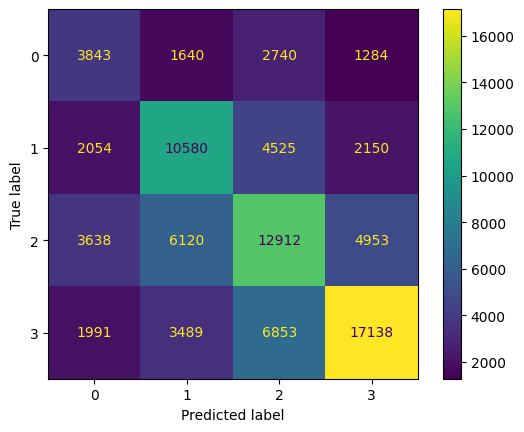

In [44]:
#The confusion matrix for it:
from sklearn.metrics import confusion_matrix
print("Sentiment classification task confusion matrix:")
confusion_matrix(Ysenti_test, y_senti_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(baseDTCsenti, X_test, Ysenti_test)

In [45]:
#Classification Report:
from sklearn.metrics import classification_report
print(classification_report(Ysenti_test, y_senti_pred))

              precision    recall  f1-score   support

           0       0.33      0.40      0.37      9507
           1       0.48      0.55      0.51     19309
           2       0.48      0.47      0.47     27623
           3       0.67      0.58      0.62     29471

    accuracy                           0.52     85910
   macro avg       0.49      0.50      0.49     85910
weighted avg       0.53      0.52      0.52     85910



## 2.3.3 Base-MLP: a Multi-Layered Perceptron with the default parameters.

In [13]:
clf_obj2 = MLPClassifier(max_iter = 1)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptron with default parameters for emotions.

              precision    recall  f1-score   support

           0       0.52      0.47      0.50      5348
           1       0.55      0.51      0.53      3061
           2       0.40      0.14      0.21      2589
           3       0.22      0.02      0.03      4159
           4       0.45      0.04      0.07      5694
           5       0.25      0.04      0.07      1717
           6       0.48      0.05      0.09      2484
           7       0.46      0.08      0.14      2938
           8       0.44      0.16      0.24      1055
           9       0.27      0.01      0.02      2277
          10       0.25      0.03      0.05      3872
          11       0.71      0.07      0.12      1465
          12       0.00      0.00      0.00       749
          13       0.69      0.04      0.07      1507
          14       0.58      0.02      0.05       895
          15       0.83      0.74      0.79      3513
 

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


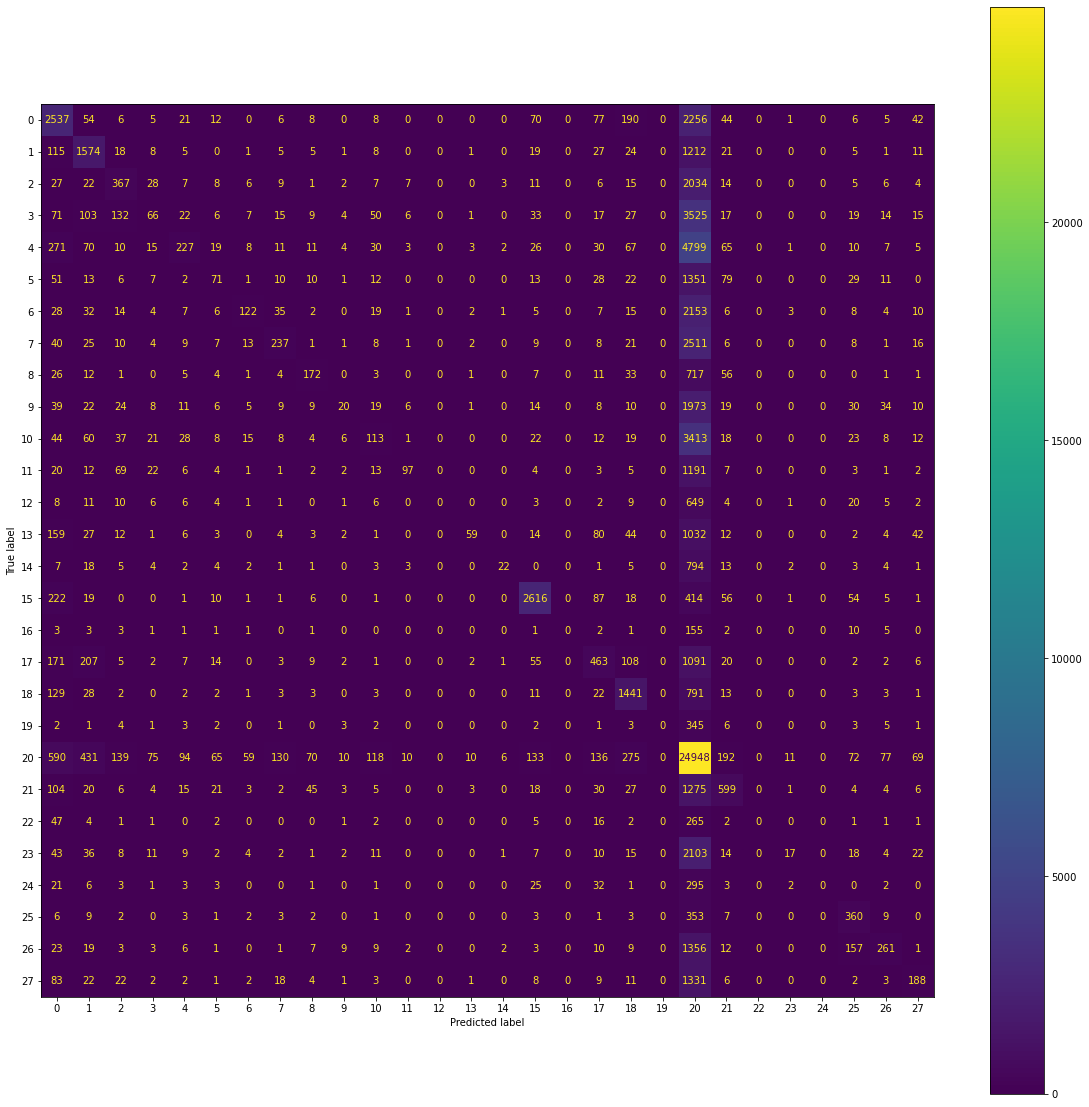

In [16]:
clf_obj2.fit(X_train,Yemo_train)#training the data of emotions
pred = clf_obj2.predict(X_test)

print("The performance of Multilayer Perceptron with default parameters for emotions.\n")
print(classification_report(Yemo_test, pred)) 
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


The performance of Multilayer Perceptrons classifier with default parameters for sentiments.

              precision    recall  f1-score   support

           0       0.46      0.20      0.27      9481
           1       0.57      0.46      0.51     19240
           2       0.47      0.62      0.53     27720
           3       0.67      0.68      0.67     29469

    accuracy                           0.56     85910
   macro avg       0.54      0.49      0.50     85910
weighted avg       0.56      0.56      0.55     85910



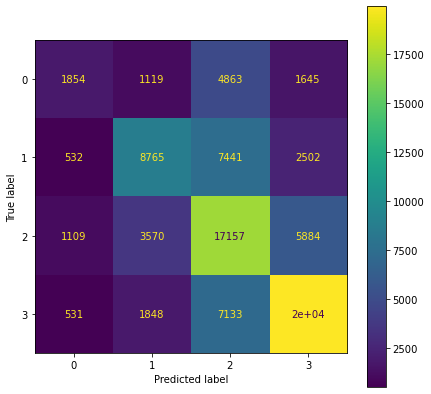

In [17]:
clf_obj2.fit(X_train,Ysenti_train) #training the data of sentiments
pred = clf_obj2.predict(X_test)

print("The performance of Multilayer Perceptrons classifier with default parameters for sentiments.\n")
print(classification_report(Ysenti_test, pred)) 
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax) 

## 2.3.4 Top-MNB: a better performing Multinomial Naive Bayes found using GridSearchCV.

c:\python3.8\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


The performance of naive bayes classifier with best hyper-parameters for emotions.

The best hyper-parameter value is : {'alpha': 0}

              precision    recall  f1-score   support

           0       0.43      0.44      0.44      5165
           1       0.42      0.48      0.45      3027
           2       0.26      0.26      0.26      2596
           3       0.17      0.14      0.15      4107
           4       0.20      0.14      0.16      5623
           5       0.19      0.24      0.21      1759
           6       0.20      0.20      0.20      2450
           7       0.27      0.25      0.26      2964
           8       0.20      0.24      0.22      1045
           9       0.15      0.13      0.14      2398
          10       0.19      0.17      0.18      3839
          11       0.21      0.20      0.20      1461
          12       0.16      0.18      0.17       746
          13       0.17      0.15      0.16      1532
          14       0.28      0.32      0.30       884
 

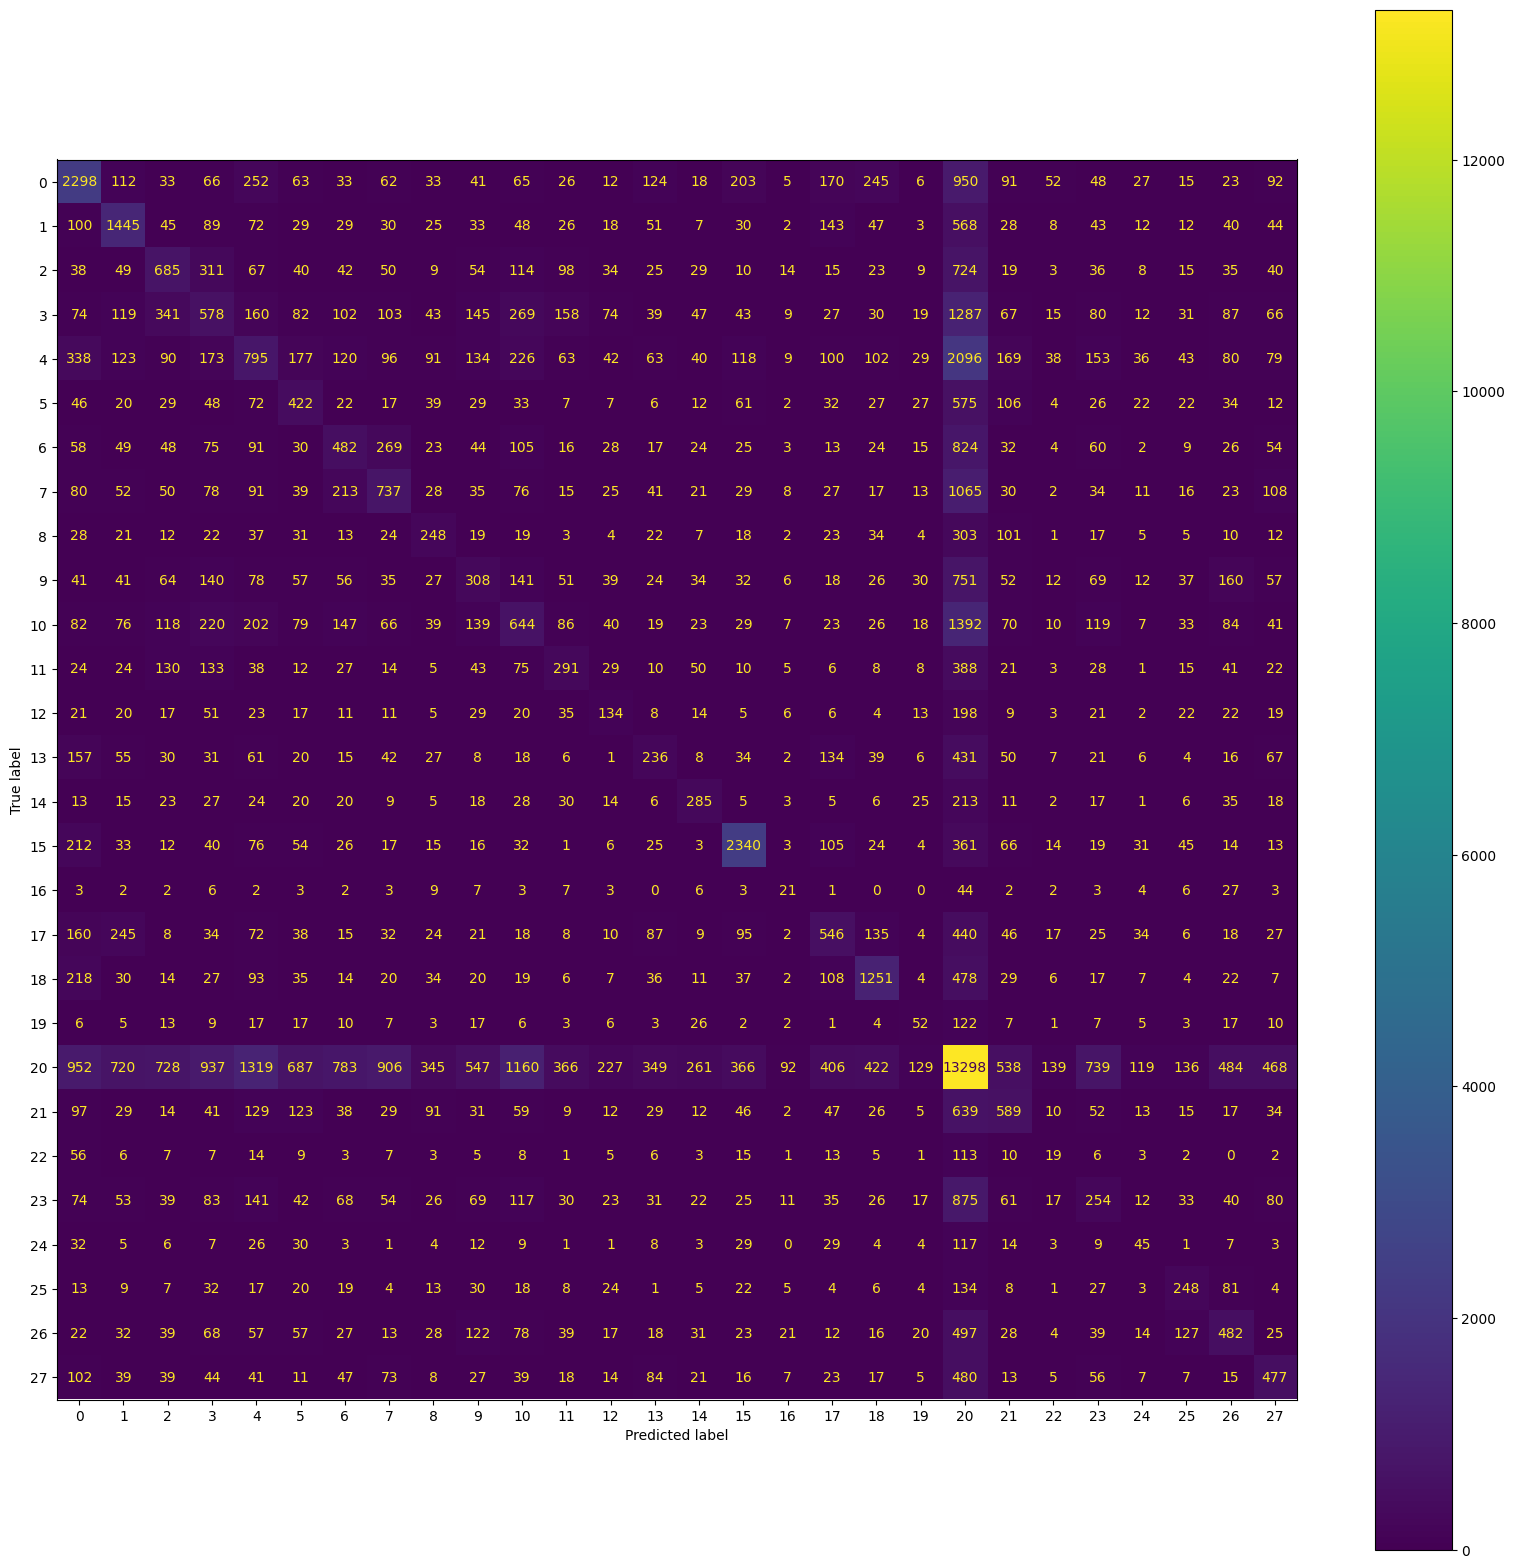

In [46]:
MNB = MultinomialNB()

parameters = {"alpha":(2, 1, 0.5, 0)}
gs = GridSearchCV(estimator = MNB, param_grid = parameters, n_jobs = -1, refit = True, scoring = "f1_weighted")
gs.fit(X_train, Yemo_train)
pred = gs.best_estimator_.predict(X_test)

print("The performance of naive bayes classifier with best hyper-parameters for emotions.\n")
print(f"The best hyper-parameter value is : {gs.best_params_}\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax)

The performance of naive bayes classifier with best hyper-parameters for sentiments.

The best hyper-parameter value is : {'alpha': 0.5}

              precision    recall  f1-score   support

           0       0.38      0.26      0.31      9507
           1       0.52      0.52      0.52     19309
           2       0.48      0.46      0.47     27623
           3       0.61      0.69      0.65     29471

    accuracy                           0.53     85910
   macro avg       0.50      0.48      0.48     85910
weighted avg       0.52      0.53      0.52     85910



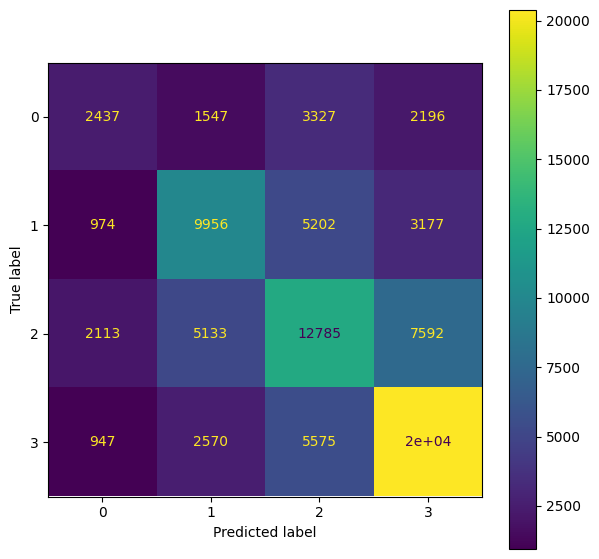

In [47]:
#for sentiments classification
parameters = {"alpha":(2, 1, 0.5, 0)}
gs = GridSearchCV(estimator = MNB, param_grid = parameters, n_jobs = -1, refit = True, scoring = "f1_weighted")
gs.fit(X_train, Ysenti_train)
pred = gs.best_estimator_.predict(X_test)

print("The performance of naive bayes classifier with best hyper-parameters for sentiments.\n")
print(f"The best hyper-parameter value is : {gs.best_params_}\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

## 2.3.5 Top-DT: a better performing Decision Tree found using GridSearchCV.

In [48]:
from sklearn import tree
#2.3.5 Top DT for emotions:
topDTCemo = tree.DecisionTreeClassifier(criterion = "entropy" ,  max_depth = 25, min_samples_split = 4)
topDTCemo.fit(X_train, Yemo_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=4)

In [49]:
y_emo_pred_top = topDTCemo.predict(X_test)

In [50]:
#Making a parameter for the param_grid part of the GridSearchCV function:
parameters_for_the_grid_emo = {
    "criterion" : ["gini" , "entropy"] , 
    "max_depth" : [25, 50], 
    "min_samples_split" : [4 , 7 , 10]
}

In [51]:
from sklearn.model_selection import GridSearchCV
gSCVemo = GridSearchCV(estimator = topDTCemo, param_grid = parameters_for_the_grid_emo)
#Fitting the instance
gSCVemo.fit(X_train, Yemo_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=25,
                                              min_samples_split=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 50],
                         'min_samples_split': [4, 7, 10]})

In [52]:
#2.4 Performances for the emotion part (Top DT):
print("Top Decision Tree with hyperparameters for the emotion classification task:")

Top Decision Tree with hyperparameters for the emotion classification task:


Emotion classification task confusion matrix:


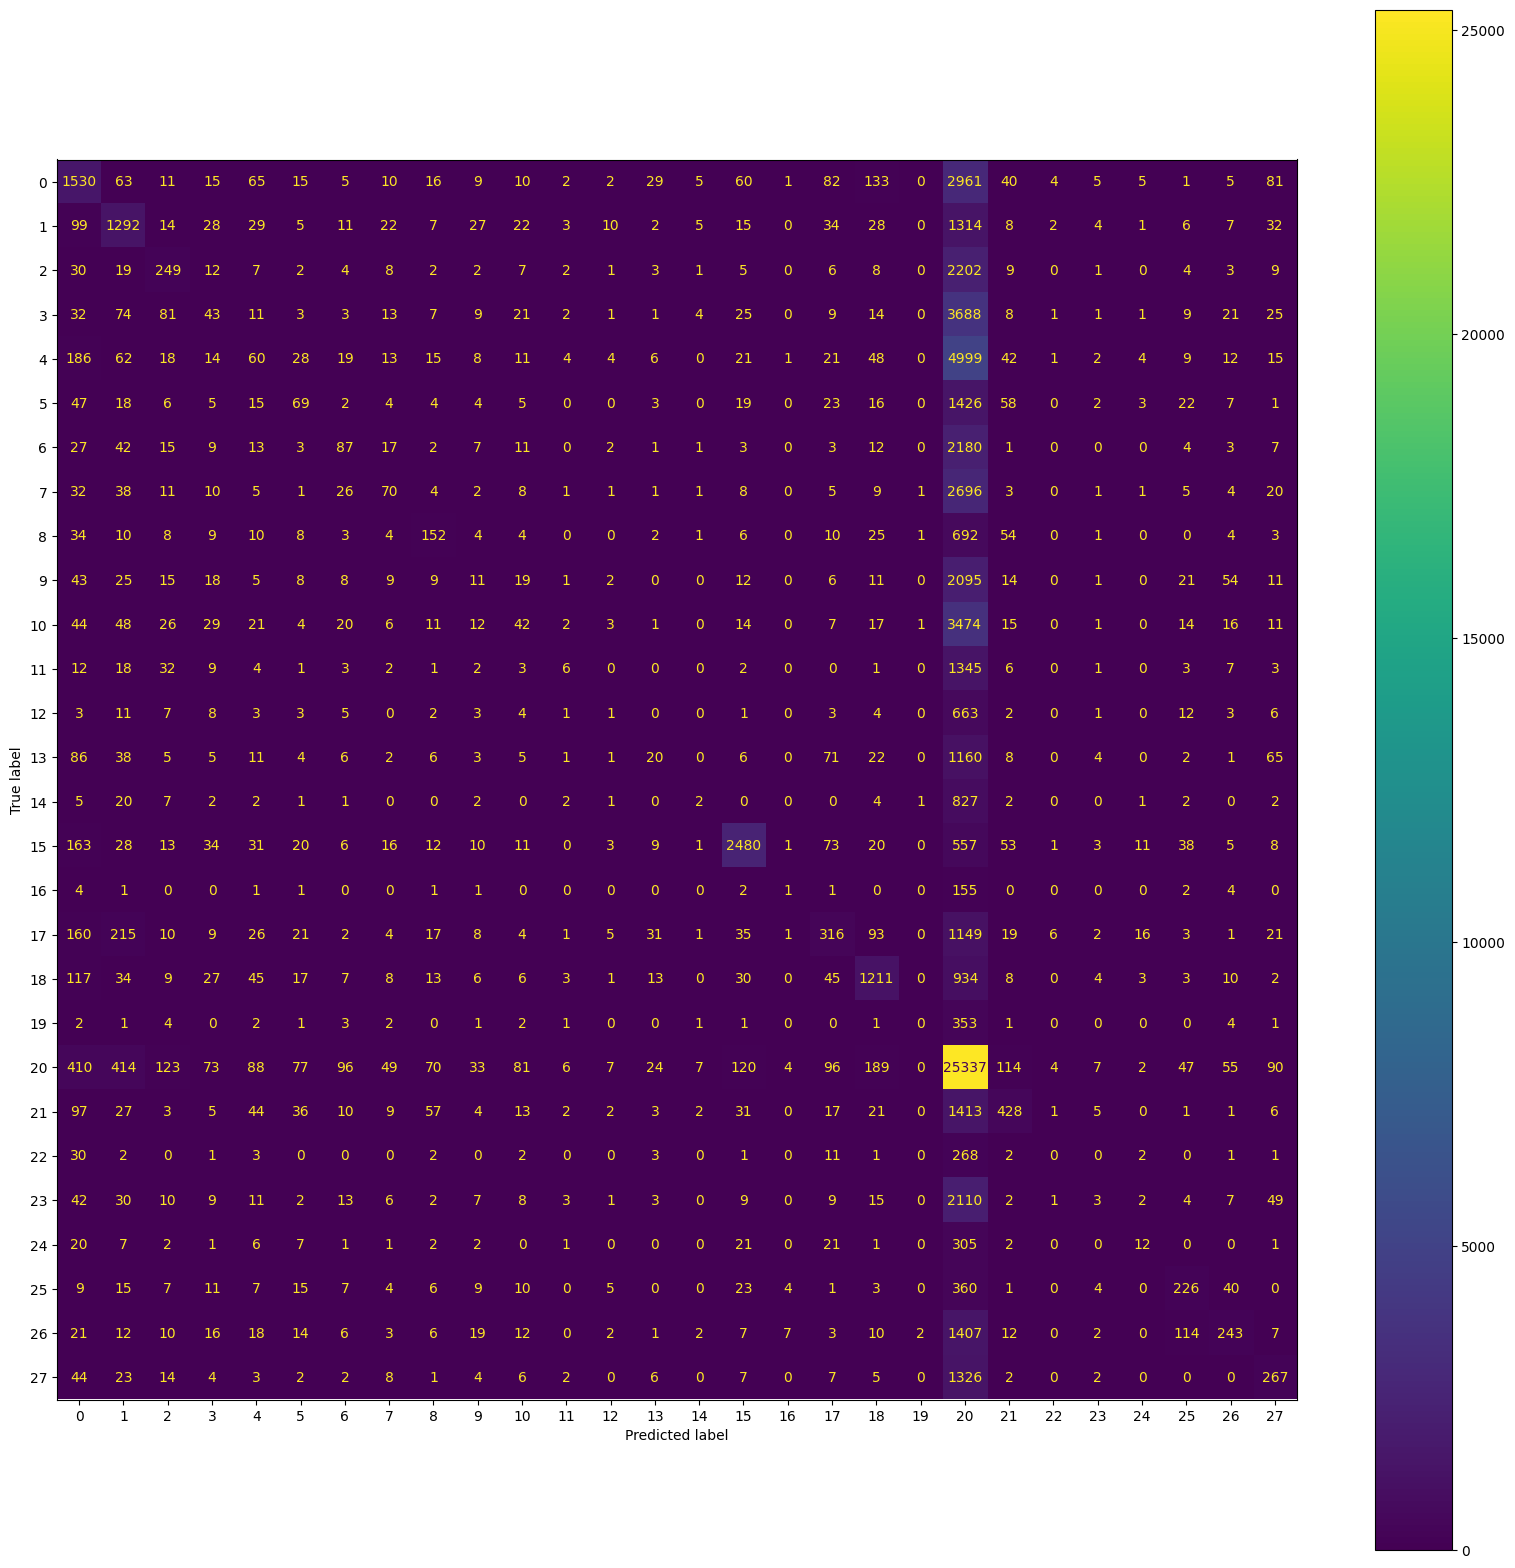

In [53]:
#The confusion matrix for it:
from sklearn.metrics import confusion_matrix
print("Emotion classification task confusion matrix:")
conf_mat_top = confusion_matrix(Yemo_test, y_emo_pred_top)
from sklearn.metrics import ConfusionMatrixDisplay
cmdisp_top = ConfusionMatrixDisplay(conf_mat_top)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
cmdisp_top.plot(ax = ax)

In [54]:
#Classification Report:
from sklearn.metrics import classification_report
print(classification_report(Yemo_test, y_emo_pred_top))

              precision    recall  f1-score   support

           0       0.46      0.30      0.36      5165
           1       0.50      0.43      0.46      3027
           2       0.35      0.10      0.15      2596
           3       0.11      0.01      0.02      4107
           4       0.11      0.01      0.02      5623
           5       0.19      0.04      0.06      1759
           6       0.24      0.04      0.06      2450
           7       0.24      0.02      0.04      2964
           8       0.36      0.15      0.21      1045
           9       0.05      0.00      0.01      2398
          10       0.13      0.01      0.02      3839
          11       0.13      0.00      0.01      1461
          12       0.02      0.00      0.00       746
          13       0.12      0.01      0.02      1532
          14       0.06      0.00      0.00       884
          15       0.84      0.69      0.75      3607
          16       0.05      0.01      0.01       174
          17       0.36    

In [55]:
from sklearn import tree
#2.3.5 Base DT for sentiments:
topDTCsenti = tree.DecisionTreeClassifier()
topDTCsenti.fit(X_train, Ysenti_train)

DecisionTreeClassifier()

In [56]:
y_senti_pred_top = topDTCsenti.predict(X_test)

In [57]:
#Making a parameter for the param_grid part of the GridSearchCV function:
parameters_for_the_grid_senti = {
    "criterion" : ["gini" , "entropy"] , 
    "max_depth" : [25, 50], 
    "min_samples_split" : [4 , 7 , 10]
}

In [58]:
from sklearn.model_selection import GridSearchCV
gSCVsenti = GridSearchCV(estimator = topDTCsenti, param_grid = parameters_for_the_grid_senti)
#Fitting the instance
gSCVsenti.fit(X_train, Ysenti_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 50],
                         'min_samples_split': [4, 7, 10]})

In [59]:
#2.4 Performances for the sentiment part (Top DT):
print("Top Decision Tree with hyperparameters for the sentiment classification task:")

Top Decision Tree with hyperparameters for the sentiment classification task:


Sentiment classification task confusion matrix:


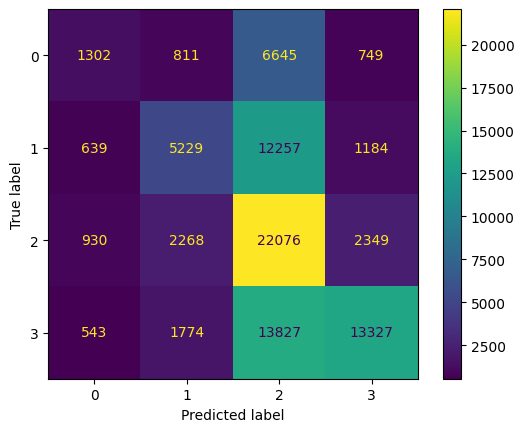

In [60]:
#The confusion matrix for it:
from sklearn.metrics import confusion_matrix
print("Sentiment classification task confusion matrix:")
confusion_matrix(Ysenti_test, y_senti_pred_top)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gSCVsenti, X_test, Ysenti_test)

In [61]:
#Classification Report:
from sklearn.metrics import classification_report
print(classification_report(Ysenti_test, y_senti_pred_top))

              precision    recall  f1-score   support

           0       0.33      0.40      0.36      9507
           1       0.48      0.55      0.51     19309
           2       0.48      0.47      0.47     27623
           3       0.67      0.58      0.62     29471

    accuracy                           0.52     85910
   macro avg       0.49      0.50      0.49     85910
weighted avg       0.53      0.52      0.52     85910



## 2.3.6 Top-MLP: a better performing Multi-Layered Perceptron found using GridSearchCV.

In [18]:
param_grid=[
    { 'activation': ['logistic','tanh','relu','identity'], 'hidden_layer_sizes':[(30,50),(10,10,10)], 'solver':['adam','sgd']}
]


In [19]:
#training the data of emotions using GridSearchCV
grid_search = GridSearchCV(clf_obj2, param_grid, scoring='f1_weighted').fit(X_train,Yemo_train)
print("The best parameter is:  ")
print(grid_search.best_params_)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

The best parameter is:  
{'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      0.47      0.48      5348
           1       0.52      0.59      0.56      3061
           2       0.36      0.15      0.21      2589
           3       0.17      0.03      0.06      4159
           4       0.37      0.01      0.02      5694
           5       0.26      0.02      0.04      1717
           6       0.43      0.03      0.05      2484
           7       0.37      0.07      0.12      2938
           8       0.46      0.14      0.21      1055
           9       0.00      0.00      0.00      2277
          10       0.19      0.05      0.07      3872
          11       0.56      0.02      0.04      1465
          12       0.00      0.00      0.00       749
          13       0.58      0.02      0.04      1507
          14       0.47      0.07      0.12       895
          15       0.76      0.77      0.77      3513
          16       0.00      0.00      0.00       190
          17       0.39    

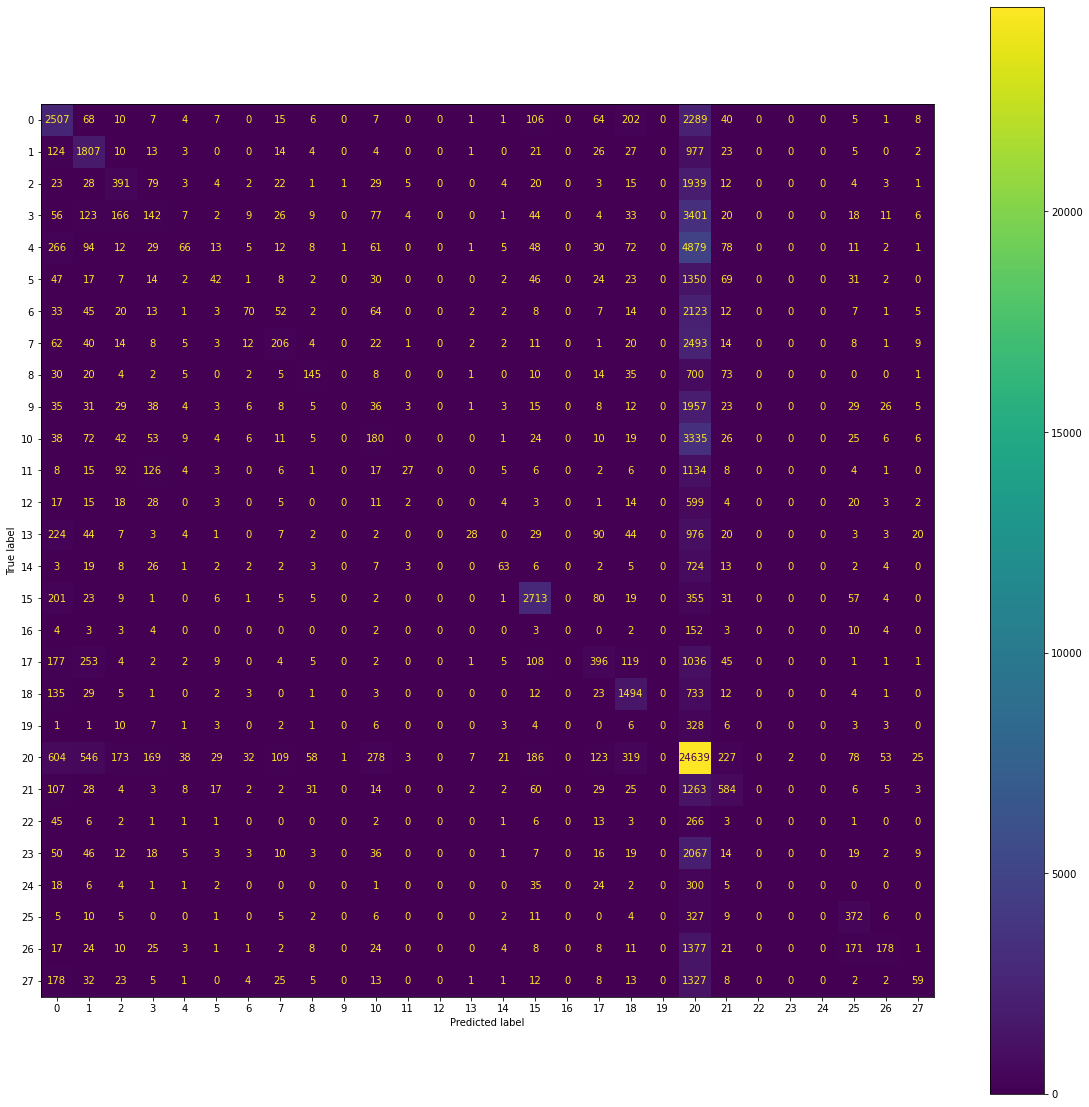

In [20]:
pred = grid_search.predict(X_test)

print(classification_report(Yemo_test, pred))

cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 

In [22]:
#training the data of sentiments using GridSearchCV
grid_search = GridSearchCV(clf_obj2, param_grid, scoring='f1_weighted').fit(X_train,Ysenti_train)
print("The best parameter is:  ")
print(grid_search.best_params_)


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/p

The best parameter is:  
{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.44      0.20      0.28      9481
           1       0.54      0.54      0.54     19240
           2       0.48      0.55      0.52     27720
           3       0.66      0.69      0.67     29469

    accuracy                           0.56     85910
   macro avg       0.53      0.49      0.50     85910
weighted avg       0.55      0.56      0.55     85910



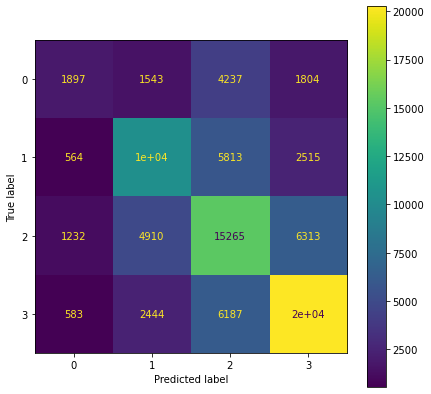

In [23]:
pred = grid_search.predict(X_test)

print(classification_report(Ysenti_test, pred))

cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax) 